# CSP to SDP NIP Data Rates & Data Models v1.0

**Author:** Dr Robert Lyon

**Contact:** robert.lyon@manchester.ac.uk

**Institution:** University of Manchester

**Affiliation:** SKA Group, Time Domain Team (TDT)

**Version:** 1.0

**Date: 25/05/2017**

**Acknowledgements:** This notebook is based on work by Dr. Lina Levin-Preston & Prof. Ben Stappers. Lina wrote the original data models document, did all the data volume/rate calculations, and provided the original notation! Ben worked on this too. This notebook relies greatly on their earlier work.

## Introduction
This notebook and the report that accompanies it, describe the conceptual and logical data models for the Non-Imaging Processing (NIP) components of the SKA Science Data Processor (SDP), according to [Software Engineering Institute](http://www.sei.cmu.edu) (SEI) standards. The notebook was created for JIRA [TSK-1294](https://jira.ska-sdp.org/browse/TSK-1294), which requested SEI compliant versions of the NIP data models. This document represents the 4th iteration (at least) of the data models work, however only the last two iterations, [TSK-12](https://jira.ska-sdp.org/browse/TSK-12) and [TSK-73](https://confluence.ska-sdp.org/display/WBS/TSK-73+Data+models) are recorded in JIRA. The data models in this notebook replace those in the document produced for [TSK-73](https://confluence.ska-sdp.org/display/WBS/TSK-73+Data+models). However that document still contains detailed pipeline descriptions, and also defines the key pipeline components. Thus it should still be consulted.

All data models presented in this notebook are described via [Entity-Relationship Models](https://en.wikipedia.org/wiki/Entity–relationship_model) (ERMs). These are sometimes referred to as an entity-relationship diagrams (ERDs). There is no standard notation for ERMs, however we have attempted to adhere to defacto standards. Unified Modelling Language (UML) [activity diagrams](https://en.wikipedia.org/wiki/Activity_diagram) are also used to characterise the processing activity within NIP, which ingests and outputs the data models.

This ipython notebook also models the input data rates and data volumes for NIP. It includes models for,

* *pulsar/transient search mode*.
* *pulsar timing mode*.
* *dynamic spectra mode*. The SKA science working group are discussing changing the name of this mode, to better reflect its function. The current name proposed is "Pulsar search filterbank format Data Stream". Please be aware of this, as this change may come into effect after this notebook is finished. The name may even be changed to something entirely different. 

It achieves this through interactive Python 2.7 code. This can be run either within this notebook, or externally via a supplied source code directory. 

Given the use of ERM & UML, basic familiarity with SEI standards is recommended to fully understand the diagrams and terminology used in this notebook. The use of SEI standards has also slightly changed the notation used here, compared to previous iterations of the data model work in [TSK-73](https://confluence.ska-sdp.org/display/WBS/TSK-73+Data+models). For more information on SEI standards please see "Data Models as an Architectural View", Merson P., 2009. Alternatively, the following [wikipedia page](https://en.wikipedia.org/wiki/Entity–relationship_model) presents a very concise overview of ERMs. If you don't have time to read either of these, it is necessary to understand some simple concepts.

1. **Entity**: An entity is an abstract concept that describes some 'thing' that exists physically or logically in the real world (most nouns can be considered entities). 
2. **Relationship**: Relationships exist between entities, defining how they interact.
3. ** Attributes**: These describe characteristics of an entity.
4. An ERM model is simple a combination of relationships between entities which posses attributes.
5. **Conceptual Entity-Relationship model**: Describes a data model at the highest level of abstraction. Defines only in basic detail the data model components and the relationships between them.
6. **Logical Entity-Relationship model**: Builds upon a conceptual model by explicitly defining the attributes (i.e. characteristics) forming entities that comprise the data model. Logical models describe the data at an intermediate level of abstraction. Logical models do not take into consideration the physical storage/transport of the data, or implementation specific details required to realise a data model in a real software system.
7. **Physical Entity-Relationship model**: Builds upon the logical model. Describes the data model in sufficient detail to allow implementation in software.

This notebook provides conceptual and logical models only.

## Code & License
All the code shown here is stored in a separate software source directory. This directory includes detailed unit tests, which ensure the code works as it should. The code and the contents of this notebook are released under the GNU GENERAL PUBLIC LICENSE, Version 3, 29 June 2007. We kindly request that if you make use of the notebook, you cite the work appropriately. 

## Assumptions & Caveats

1. ERMs and UML diagrams are used here in lieu of other modelling approaches. This is primarily because both are simple to understand. It is also the case that no specific models were requested for [TSK-1294](https://jira.ska-sdp.org/browse/TSK-1294), thus these were assumed to be adequate. There are many modelling approaches [available](https://en.wikipedia.org/wiki/Data_modeling) and until asked to use one in particular, we avoid using too many different modelling methods.

2. ERMs are sometimes not ideal for describing the conceptual, logical, or physical data models within NIP. This is because the SEI standard is geared toward designing database systems, and not a real-time parallel processing systems such as the CSP or SDP. Where possible we try to explain any parts which are unclear, and work around any modelling issues.

3. The data models presented here are not final. They could change for many reasons, i.e. changing science requirements, changing costs, changes to the system design, changes to the design upstream (in CSP). Nonetheless the data models are almost complete, with the exception of some  To be decided  (TBD) items. The models are therefore unlikely to change in any significant way. They can be trusted to give a realistic impression of what NIP data models will look like in practice. Any TBD items are being worked on, and should be finalised soon.

4. Until the design for the Central Signal Processor (CSP) is finalised, the precise data rates and volumes entering the SDP cannot be known. This notebook therefore produces **estimates only**. These estimates are thought to represent best guesses, and take into account the likely final design of the CSP system. The values produced by this notebook are intended to help the design process.

5. This notebook does not provide data models or data rates, for the parameters passed to computational components within SDP NIP. Until we know i) where such parameters are stored, and ii) how they are accessed, we cannot know for certain how internal SDP data rates will vary with time. For example, consider the pulsar timing pipeline. Where is the pulsar ephemerides maintained? How is it accessed? These questions make it tricky to be exact in our models so we avoid such detail. However, we have described the function parameters required by NIP components in the report accompanying this document. We also estimate their cadence (rate of delivery), and describe their likely data type & size.

6. In this notebook data rates and volumes are defined via International System of Units (SI) standards. Please see [here](https://en.wikipedia.org/wiki/International_System_of_Units) for more information. Where possible data volumes are described in terms of bits, and data rates in terms of bits per second. In some cases byte units are used, but only to make the data volumes under discussion easier to understand.

7. The precise character encoding used for text data is important when computing data volumes. Different encodings have different space requirements per character (e.g. ascii - 1 byte per char, UTF-8 - 1 to 4 byte per char, UTF-16 - 2 byte per char - but variable 1-2, and UTF-32 - 4 byte per char exactly). For the purposes of this notebook, all characters are assumed to be stored in ascii, i.e. 8-bits (1 byte) per character.

8. An identical data model realised in two different file formats (e.g. HDF5 vs. binary) will lead to different data model sizes and data rates. The same is true of data rates, which assume no transfer overheads. The choice of communication protocol will add overheads which will increase the data rate in practice. Thus data volume/rate figures should be treated with care and communication/file system overheads not forgotten.

9. The words "attribute" and "variable" are used somewhat interchangeably in this notebook. So to are the words "object" and "entity".

10. All parameter values presented here are taken from the document TEL-SDP-0000080. These are the parameters used to compute data volumes and data rates.

## Notation
### Data Volume/Rate Notation
For this notebook data volumes/rates are described in terms of bits. Functions are provided that convert between bits and bytes and Section 3., making it easier to understand the quantities being discussed.


|  Symbol | Description                                           |
|---------|-------------------------------------------------------|
|$bit$    | a single bit of information.                          |
|$kbit$   | kilobit, $10^3 = 1000$ bits.                          |
|$Mbit$   | megabit, $10^6 = 1$ bits.                             |
|$Gbit$   | gigabit, $10^9 = 1$ bits.                             |
|$Tbit$   | terabit, $10^12 = 1$ bits.                            |
|$Pbit$   | petabit, $10^15 = 1$ bits.                            |
|$bit/s$  | Bits per second.                                      |
|$kbit/s$ | Kilobits per second.                                  |
|$Mbit/s$ | Megabits per second.                                  |
|$Gbit/s$ | Gigabits per second.                                  |
|$Tbit/s$ | Terabits per second.                                  |
|$Pbit/s$ | Petabits per second.                                  |
|$B$      | a byte, eight bits of information.                    |
|$kB$     | kilobyte, $10^3$ bytes ($8 \times 10^3$ bits).        |
|$MB$     | megabyte, $10^6$ bytes ($8 \times 10^6$ bits).        |
|$GB$     | gigabyte, $10^9$ bytes ($8 \times 10^9$ bits).        |
|$TB$     | terabyte, $10^12$ bytes ($8 \times 10^12$ bits).      |
|$PB$     | petabyte, $10^15$ bytes ($8 \times 10^15$ bits).      |
|$B/s$    | Bytes per second.                                     |
|$kB/s$   | Kilobytes per second.                                 |
|$MB/s$   | Megabytes per second.                                 |
|$GB/s$   | Gigabytes per second.                                 |
|$TB/s$   | Terabytes per second.                                 |
|$PB/s$   | Petabytes per second.                                 |
**Table 1.a.** The data volume/rate notation used in this notebook.

### Data Model Notation

The notation used to describe the size of entities and attributes.

|      Symbol             | Description                                                                             |
|-------------------------|-----------------------------------------------------------------------------------------|
|$AVG_{i}^{att}$          |Pulsar timing pipeline averaged (intermediate) data product attribute $i$ size in bits.  |
|$AVG_{size}$             |Pulsar timing pipeline averaged (intermediate) data product entity size.                 |
|$C_{avg}$                |The size in bits of an averaged data cube (pulsar timing intermediate product).          |
|$c$                      |The number of columns in a 'Sheet' entity (formally S/N sheet).                          |
|$C_{size}^{search}$      |The size of the candidate search data cube in bits.                                      |
|$C_{size}^{time}$        |The size of the timing data cube in bits.                                                |
|$D_{i}^{att}$            |The size in bits of Candidate data entity attribute $i$.                                 |
|$D_{size}$               |Size of the candidate data entity, belonging to a search data product.                   |
|$D_{vol}^{att}$          |The volume of attributes in bits belonging to the 'Candidate Data' entity.               |
|$L_{size}$               |Size of the 'Candidate List' entity  in bits, which belongs to a search data product.    |
|$L_{i}^{att}$            |The size of the Candidate 'List' entity attribute $i$ in bits.                           |
|$L_{vol}^{att}$          |The volume of attribute data in bits belonging to a candidate 'List' entity.             |
|$M_{burst}$              |Number of candidate bursts.                                                              |
|$M_{cand}$               |Size of a pulsar candidate data cube in bytes.                                           |
|$M_{metadata}$           |Size of metadata in bytes.                                                               |
|$M_{OCLD}$               |Size of a pulsar search optimised candidate list and data (OCLD) object in bytes.        |
|$M_{pulsar}$             |Size of pulsar timing data cube in bytes.                                                |
|$M_{size}^{search}$      |The volume of metadata belong to a 'Candidate Data' entity in bits.                      |
|$M_{size}^{times}$       |The volume of metadata belong to a timing data entity in bits.                           |
|$M_{size}^{AVG}$         |The volume of averaged data product (pulsar timing intermediate product)  metadata.      |
|$M_{sheet}$              |Size of an S/N sheet in bytes.                                                           |
|$M_{SPOCLD}$             |Size of a single pulse optimised candidate list and data (SPOCLD) object in bytes.       |
|$Meta_{vol}^{att}$       |The volume of Metadata attributes in bits.                                               |
|$Meta_{i}^{att}$         |The size of Metadata attribute $i$ in bits.                                              |
|$N_{AVG}^{att}$          |Number of attributes belonging to an averaged data product.                              |
|$N_{beam}$               |The number of telescope beams used during a scan.                                        |
|$N_{bin}$                |The number of phase bins.                                                                |
|$N_{bit}$                |The number of bits per sample.                                                           |
|$N_{burst}$              |The number of single-pulse detections made per second, per beam, during a scan.          |
|$N_{byte}$               |Number of bytes.                                                                         |
|$N_{byte;sheet}$         |Number of bytes per S/N sheet.                                                           |
|$N_{cand}$               |Number of pulsar candidates per beam.                                                    |
|$N_{CD}^{att}$           |The number of 'Candidate Data' entity attributes.                                        |
|$N_{chan}$               |The number of frequency channels.                                                        |
|$N_{sub}$                |The number temporal sub-integrations.                                                    |
|$N_{list}$               |The number of candidates in the candidate 'List' entity.                                 |
|$N_{list}^{att}$         |The number of attributes belonging to the 'List' entity.                                 |
|$N_{meta}^{att}$         |The number of attributes belonging to the 'Metadata' entity.                            |
|$N_{OCLD}^{att}$         |The number of OCLD entity attributes.                                                    |
|$N_{pol}$                |The number of polarisations.                                                             |
|$N_{PTD}^{scan}$         |The number of PTD objects received by SDP per scan.                                      |
|$N_{PTD}^{att}$          |The number of PTD entity attributes.                                                     |
|$N_{SD}^{att}$           |The number of 'Search Data' entity attributes.                                           |
|$N_{sheet}$              |The number of Sheets in a 'Candidate Data' entity.                                       |
|$N_{SPOCLD}^{att}$       |The number of SPOCLD entity attributes.                                                  |
|$N_{TD}^{att}$           |The number of 'Timing Data' entity attributes.                                           |
|$OCLD_{i}^{att}$         |The size of OCLD attribute $i$ in bits.                                                  |
|$OCLD_{vol}^{att}$       |Volume in bits of the attributes belonging to the OCLD.                                  |
|$OCLD_{size}$            |Total OCLD size per scan.                                                                |
|$PTD_{i}^{att}$          |The size of PTD attribute $i$ in bits.                                                   |
|$PTD_{vol}^{att}$        |Volume in bits of the attributes belonging to the PTD                                    |
|$PTD_{size}$             |Total PTD size per scan.                                                                 |
|$r$                      |The number of rows in a Sheet entity (formally S/N sheet).                               |
|$SD_{size}$              |Search data product size (for pulsar and transient search).                              |
|$SD_{i}^{att}$           |The size in bits of search data attribute $i$.                                           |
|$SD_{vol}^{att}$         |The volume of attribute data in bits, belonging to a search data product.                |
|$S_{i,size}$             |The size of Sheet $i$ in bits.                                                           |
|$S_{size}$               |The size of all the sheets per candidate in bits.                                        |
|$SPOCLD_{i}^{att}$       |The size of SPOCLD attribute $i$ in bits.                                                |
|$SPOCLD_{vol}^{att}$     |Volume in bits of the attributes belonging to the SPOCLD.                                |
|$SPOCLD_{size}$          |Total SPOCLD size per scan.                                                              |
|$TD_{i}^{att}$           |The size in bits of timing data attribute $i$.                                           |
|$TD_{size}$              |Timing data product size (for timing and dynamic spectra modes).                         |
|$TD_{vol}^{att}$         |The volume of attribute data in bits belonging to a timing data product.                 |
|$T_{scan}$               |Length of a scan in seconds.                                                             |
|$T_{size}$               |The size of the 'Timing Data' entity in bits.                                            |
|$Trial_{DM}$	          |Trial DMs.                                                                               |
|$Trial_{p}$	          |Trial periods.                                                                           |
|$Trial_{\dot{p}}$        |Trial period derivatives.                                                                |


**Table 1.b.** The general notation used in this notebook.

## Abbreviations

|  Symbol | Description                                           |
|---------|-------------------------------------------------------|
| CSP	  | Central Signal Processor                              |
| DEC	  | Declination                                           |
| DSD	  | Dynamic spectra data                                  |
| DM	  | Dispersion measure                                    |
| LMC	  | Local Monitoring & Control                            |
| MSP	  | Millisecond pulsar                                    |
| NIP	  | Non-Imaging Pipeline                                  |
| OCLD	  | Optimal Candidate List and Data                       | 
| OCL	  | Optimal Candidate List                                |
| PSRC	  | Pulsar candidate                                      |
| PSRFITS | A standard FITS-based format for pulsar data files    |
| PTA	  | Pulsar timing array                                   |
| PTD	  | Pulsar timing data                                    |
| QA	  | Quality assurance                                     |
| RA	  | Right Ascension                                       |
| RFI	  | Radio Frequency Interference                          |
| SDP	  | Science Data Processor                                |
| SEI     | Software Engineering Institute                        |
| S/N	  | Signal-to-noise ratio                                 |
| SPC	  | Single pulse candidate                                |
| SP	  | Single Precision Floating Point                       |
| SPOCLD  | Single Pulse Optimal Candidate List and Data          |
| TBC	  | To be confirmed                                       |
| TBD	  | To be decided                                         |
| TOA	  | Time-of-arrival                                       |
**Table 2.** The abbreviations used in this notebook.

## Terminology

The text here describing terminology is taken from the document *"SKA1 OPERATIONAL CONCEPT DOCUMENT"* (SKA‐TEL‐SKO‐0000307). Please see that document for further clarifications.

**Schedule Block (SB):** The SB is the atomic unit of planning and contains all information with respect to the
telescope and instrument configurations. Telescope/instrument configurations can only change at the SB level. Observers interact with their project/observation design at the SB level (e.g. target
lists, instrument/telescope configurations, calibration choices). A SB should include all information necessary to enable a "science‐ready" product (e.g. calibration requirements), and should include all information necessary for it to be successfully (i.e. without error) executed at the telescope. SBs may have a range of durations and a SB executes on a sub-array, which may include the full array.

**Programme Block (PB):**  A Programme Block allows for related SBs to be grouped (not just for organisational purposes). The SBs in a Programme Block can be related by certain scheduling constraints. SBs that need to be observed in a specific order, SBs that have specific scheduling constraints (e.g. near simultaneous LOW/MID observing, or coordinated observations with non‐SKA facilities).

**Scan: ** A scan is the atomic unit of execution. For example, tracking a single source for a duration of 1‐hr is an executable scan command. A SB consists of one or more scans. Long integrations can be built up by repeating a number of sequential scans (rather than repeating the SB). If the scan or SB is interrupted and some time passes, then the SB will have to be repeated. The system configuration is fixed during a scan.

## Formula Summary

Here the key formulas used in this notebook are presented for quick viewing. These formulas are different to those presented in the Interface Control Document, and previous data model documents. The new formulas provide more precise estimates of data product sizes. We list the original formulas here so they can be compared. The primary difference is that the new formulas take into account data product attributes which the original formulas did not.

### Previous Data Model Formulas

#### OCLD

$M_{OCLD}=N_{cand} \times (M_{cand} + M_{sheet} + M_{metadata})$

#### OCLD Candidate Cube:

$M_{cand}=N_{chan} \times N_{bin} \times N_{sub} \times N_{byte}$

#### OCLD S/N Sheets:

$M_{sheet}=((Trial_{p} \times Trial_{\dot{p}})+(Trial_{p} \times Trial_{dm})+(Trial_{\dot{p}} \times Trial_{dm})) \times N_{byte;sheet}$

#### OCLD Metadata:

$M_{metadata} \approx 10,000 \textrm{ bytes}$

#### SPOCLD 

$M_{SPOCLD}=N_{cand}\times (M_{burst} + M_{sheet} + M_{metadata})$

#### Single-pulse burst

$M_{burst}=N_{samp} \times N_{chan} \times N_{pol} \times N_{byte}$

#### SPOCLD Metadata

$M_{metadata} \approx 10,000 \textrm{ bytes}$

#### SPOCLD Sheets:

$M_{sheet}=((N_{chan} \times 1)+ (Trial_{DM} \times 1)) \times N_{byte;sheet}$

#### Timing / Dyamic Spectra Data

$M_{pulsar}=N_{bin} \times N_{chan} \times N_{sub} \times N_{pol} \times N_{bytes}$

### New Formulas: OCLD and SPOCLD Size Per Scan & Beam

The total size of an OCLD and a SPOCLD can be determined using the same formula. Below the concept of a generic 'Search Data' (SD) is therefore used to represent both OCLD and SPOCLD data products for simplicity. Note that the sizes of the OCLD & SPOCLD do differ in practice. This is because the parameter values passed to this formula differ greatly.

---

The size of a search data product $SD_{size}$ is as follows:

$SD_{size} = SD_{vol}^{att} + L_{size} + (N_{cand} \times D_{size})\textrm{,}$

where $SD_{vol}^{att}$ is the volume of search data attributes in bits, $L_{size}$ the size of the candidate list in bits, $D_{size}$ the size of the 'Candidate Data' entity in bits, and $N_{cand}$ the number of candidates stored in the data product.

---

The total volume in bits of the attributes belonging to search data products:

$SD_{vol}^{att} = \sum_{i=1}^{N_{SD}^{att}} SD_{i}^{att} \textrm{,}$

where $N_{SD}^{att}$ is the number of 'Search Data' entity attributes, and $SD_{i}^{att}$ the size of attribute $i$ in bits.

---

Total size of an search data 'Candidate List' entity:

$L_{size} = L_{vol}^{att} = N_{list} \times \sum_{i=1}^{N_{list}^{att}} L_{i}^{att}\textrm{,}$

where $L_{vol}^{att}$ is the volume of List attributes in bits, $N_{list}$ the number of candidates in the list (not necessarily equal to $N_{cand}$), $N_{list}^{att}$ the number of list attributes, and $L_{i}^{att}$ the size of list attribute $i$ in bits.

---

Total size of search data 'Candidate Data' entity:

$D_{size} = D_{vol}^{att} + C_{size}^{search} + S_{size} + M_{size}^{search} \textrm{ ,}$

where $D_{vol}^{att}$ is the volume of attributes in bits, $C_{size}^{search}$ the size of the data cube in bits, $S_{size}$ the size of the Sheets in bits, and $M_{size}^{search}$ the size of the search data metadata. 

The value of $D_{vol}^{att}$ is given by,

$D_{vol}^{att} = \sum_{i=1}^{N_{CD}^{att}} D_{i}^{att}\textrm{,}$ 

where $N_{CD}^{att}$ is the number of attributes belonging to the Candidate Data entity.

---

The size of the search data 'Data Cube' entity in bits, $C_{size}^{search}$, is given by,

$C_{size}^{search} = N_{chan} \times N_{bin} \times N_{sub} \times N_{bit} \textrm{.}$

where $N_{chan}$ is the number of frequency channels, $N_{bin}$ the number of phase bins, $N_{sub}$ the number of temporal sub-integrations, and $N_{bit}$ the number of bits used to store each cube sample.

---

Total size of search data 'Sheet' entity in bits:

$S_{size} = \sum_{i=1}^{N_{sheet}} S_{i,size} \textrm{ ,}$

where, $S_{i,size}$ is the size of Sheet $i$ in bits such that,

$S_{i,size} = (r \times c) \times N_{bit} \textrm{ ,}$

where $r$ is the number of rows in the sheet, and $c$ the number of columns.

---

Total size of search data Metadata:

$M_{size}^{search} = Meta_{vol}^{att} = \sum_{i=1}^{N_{meta}^{att}} Meta_{i}^{att}\textrm{,}$

where $Meta_{vol}^{att}$ is the volume of Metadata attributes in bits, $N_{meta}^{att}$ the number of attrbiutes, and $Meta_{i}^{att}$ the size of Metadata attribute $i$ in bits.

### New Formulas: PTD and DSD Size Per Scan & Beam

The total size of PTD and DSD can be determined using the same formula. Below the concept of 'Timing Data' (TD) is therefore used to represent both PTD and DSD products for simplicity.

---

The size of a generic timing data product $TD_{size}$ is as follows:

$TD_{size} = TD_{vol}^{att} + T_{size} \textrm{,}$

where $TD_{vol}^{att}$ is the volume of timing data attributes in bits, and $T_{size}$ the size of the 'Timing Data' entity in bits. Attribute volume $TD_{vol}^{att}$ is given by:

$TD_{vol}^{att} = \sum_{i=1}^{N_{TD}^{att}} TD_{i}^{att}\textrm{.}$

where $N_{TD}^{att}$ is the number of 'Timing Data' entity attributes.

---

Total size of a 'Timing Data' entity:

$T_{size} = C_{size}^{time} + M_{size}^{time}$

where $C_{size}^{time}$ is the size of the data cube in bits, and $M_{size}^{time}$ the size of the data entity metadata. 

---

The size of the timing 'Data Cube' entity in bits, $C_{size}^{time}$, is given by,

$C_{size}^{time} = N_{chan} \times N_{bin} \times N_{sub} \times N_{pol} \times N_{bit} \textrm{ ,}$ (Eq. 2)

where $N_{chan}$ is the number of frequency channels, $N_{bin}$ the number of phase bins, $N_{sub}$ the number temporal sub-integrations, $N_{pol}$ the number of polarisations and $N_{bit}$ is the number of bits per sample in the cube.

---

Total size of timing data Metadata:

$M_{size}^{time} = Meta_{vol}^{att} = \sum_{i=1}^{N_{meta}^{att}} Meta_{i}^{att}\textrm{,}$

where $Meta_{vol}^{att}$ is the volume of Metadata attributes in bits, $N_{meta}^{att}$ the number of attributes, and $Meta_{i}^{att}$ the size of Metadata attribute $i$ in bits.

## Notebook Structure
The notebook is organised as follows:

1. Summary overview of the data models used by NIP.
2. NIP Pipeline Data Models
    2.1 Description of the data models underpinning pulsar timing mode.
    2.2 Description of the data models underpinning dynamic spectra mode.
    2.3 Description of the data models underpinning pulsar search mode.
    2.4 Description of the data models underpinning transient search mode.
    2.5 Description of the data models for Intermediate Data Products.
3. Data Model Code 
4. Data model volumes & rates
5. Data format overhead calculations
6. miscellaneous Activity Diagrams

# 1. NIP Pipeline Data Model Overview

In Figure 1. we have a simple conceptual model that describes the data delivered to the SDP from CSP. The model describes two generic data product entities, and four realisations of those entities. The generic data entities are symbolic, and will not exist in the real system. They are simply used to show how NIP data products relate at a fundamental level. Only the realisations will exist in practice.



![Conceptual Data Model Pulsar Search](images/RL_CDM_NIP_DataTypes.png)
**Figure 1.** Conceptual ERM model describing how NIP data models relate to one another.

The *Generic Timing Data Product* is a generic version of the pulsar timing data product collected after each timing scan (or if you're an astronomer, observation). It consists of three abstract components:

* **Attributes** which characterise the generic data type.
* **Metadata** which provides additional information regarding the generic type, such as how it was collected or when it was collected.
* A **Data Cube** containing the data describing the scan.

The *Generic Search Data Product* has all the same components as a *Generic Timing Data Product*, however it also has two additional components:

* A **List** summarising the candidates found during a search.
* One or more **Sheet** entities which will be explained in more detail shortly.

There are clearly structural similarities between NIP data products. All share three common components, whilst the search specific products represent specialisations with two additional components. Between NIP data products the common components differ only in content, and not structure. Likewise the structure of the List and Sheet components is identical for both search products (only their content differs). The generic models are realised as the four data products listed in Table 3. Using Figure 1. and the text above we can infer that,

* Pulsar Timing Data and Dynamic Spectra Data are structurally identical.
* Pulsar search and transient search data are structurally identical.
* Pulsar search and transient search data can be described as specialisations of timing data. 

To some it would appear strange to consider search data a specialisation of timing data. However here it makes sense from a software engineering perspective. It simplifies the models under consideration, and makes them easier to describe.

|Product |Description                                                                                   |
|--------|----------------------------------------------------------------------------------------------|
| PTD    | Pulsar Timing Data (PTD). A data product generated for each pulsar timing scan.              |
| DSD    | Dynamic Spectra Data (DSD). A data product also generated for each pulsar timing scan.       |
| OCLD   | Optimised Candidate List & Data (OCLD). A data product generated during a pulsar search scan.|
| SPOCLD | Optimised Single-Pulse Candidate List & Data (SPOCLD). A data product generated during a single-pulse (transient) search scan.|
**Table 3.** The primary data models discussed within this notebook.

The models listed in Table 3. are ingested by SDP. The computational components within SDP NIP then either,

1. modify their contents (e.g. via RFI excision, calibration, optimisation).
2. append new data to them as a result of data processing. This does not alter their structure, only their size.
3. generate new intermediate data products from them.

In each case the data products must propagate through the SDP. Eventually they are stored in a data archive, or sent as an alert for scientific attention.






# 2. NIP Pipeline Data Models

Here we present an overview of the data models for the data products entering SDP from CSP. More information can be found in the data models document *"Data Models for the NIP SDP Pipeline Components Arising from TSK-1294"*, produced alongside this notebook. Also note that the information will be presented according to SEI software standards. Thus you should be familiar with entity relationship models, and terminology such as 'entity', 'attribute' and 'relationship' (see the Introduction for more links).

For all four NIP pipelines, a scan represents a single observation of the sky. Conceptually each scan involves some number of telescope beams being pointed at the sky. The data collected during the pointing is pre-processed by CSP before being sent to the SDP. Each scan is part of a program block, and each program block is part of a schedule block. To ensure the source of collected data can be tracked we assume each scan is associated with,

* a unique **Scheduling Block ID**
* a unique **Program Block ID**
* a unique **Scan ID** 

This allows data collected during any individual scan to be uniquely identifiable, and the data provenance to be determined.

### 2.1 Pulsar Timing

Upon completion of a pulsar timing scan, the CSP sends pulsar timing data to the SDP for analysis. The data is used to update pulsar timing models, and to look for significant changes in pulsar pulse arrival times. Any significant changes in arrival time could be of scientific importance. Thus the SDP must be able to identify when these have occurred, and generate an appropriate alert. 

For each telescope beam used in pulsar timing mode, the CSP delivers a data product describing an observation of the timed pulsar. This data product is known as **PTD**. When in pulsar timing mode a maximum of 16 tied-array beams will be available for pulsar timing. Each beam is able to observe a different pulsar, thus a single scan can observed 16 pulsars at a time.

There is exactly one PTD produced per telescope beam for each scan. If $N_{beam}$ is the number of telescope beams used for pulsar timing, then $N_{PTD}^{scan} = N_{beam}$ is the number of PTD objects received by SDP per scan. 

In Figure 2. we present conceptual and logical models describing PTD in more detail. On the right hand side of Figure 2. is a conceptual model describing the PTD and its generation. On the left hand side is a logical model describing the PTD structure. Here we see that an PTD is comprised of 5 attributes and 2 entities. These are now explained so that the PTD can be modelled. Please note that in ERMs an entity doesn't usually posses sub-entities. However to model the PTD, we have used sub-entities. This was done so that the cardinality relations between an PTD and its sub-components could be defined correctly.

![Conceptual Data Model Transient Search](images/RL_CDM_NIP_PulsarTiming.png)
**Figure 2.** The conceptual and logical data models for pulsar timing data products entering SDP.

### 2.1.1 PTD Entity
PTD is structurally comprised of 1 strong entity, 2 weak entities, and 5 attributes. This is summarised in Table 4.

|Component            |      Parent    | ERM Type      | Cardinality |
|---------------------|----------------|---------------|-------------|
|*Scheduling Block ID*|      PTD       |Attribute      | exactly one |
|*Program Block ID*   |      PTD       |Attribute      | exactly one |
|*Scan ID*            |      PTD       |Attribute      | exactly one |
|*Beam ID*            |      PTD       |Attribute      | exactly one |
|*Pulsar ID*          |      PTD       |Attribute      | exactly one |
|*Timing data*        |      PTD       |Strong Entity  | one or more |
|*Metadata*           |  Timing data   |Weak Entity    | exactly one |
|*Data Cube*          |  Timing data   |Weak Entity    | exactly one |

**Table 4.** The main components of the PTD entity. 

PTD possesses one or more strong entities called 'Timing data'. Timing data describes an observation of a pulsar with respect to time, frequency, phase and polarisation. Whilst a PTD could contain more than one observation, it will likely only contain 1.

Timing data is comprised of two weak entities. A single instance of timing data contains 1 'Metadata' entity, and 1 'Data Cube' entity. The Data Cube entity makes up most of the PTD data volume.

---

#### **Attributes**:
The attributes belonging to PTD are listed in Table 5. below. There are $N_{PTD}^{Att}=5$ attributes.

|Index|  Attribute          | Description                                                           | Type |Size (bits)|
|-|---------------------|-----------------------------------------------------------------------|------|-----------|
|1|*Scheduling Block ID*|uniquely identifies the scheduling block the OCLD was created in.      |String|    96     |
|2|*Program Block ID*   |uniquely identifies the program block the OCLD was created in.         |String|    96     |
|3|*Scan ID*            |uniquely identifies the scan the OCLD was created in.                  |String|    96     |
|4|*Beam ID*            |uniquely identifies the  telescope beam the OCLD was generated from.   |String|    96     |
|5|*Pulsar ID*          |uniquely identifies the pulsar being timed.                            |String|    96     |
**Table 5.** The attributes of the PTD entity. Note the sizes given are in bits, and represent best estimates only.

Here attribute sizes are estimates only. This is because it is not possible to know the precise number of characters used to describe unique identifiers a priori. However it is sensible to assume that each identifier is at least 12 characters long. Since we assume an ascii character encoding which requires 8-bits per character, this corresponds to 96 bits per string (textual) attribute. Note that it is possible to use integers in place of strings for the identifiers. We choose not to do this here, since unique identifiers may include non-numeric characters (i.e. if the IDs are generated via hash functions).

If we represent the indexes of column 1 in Table 5. via the variable $i$, we can specify the size of each PTD attribute in bits as $PTD_{i}^{att}$.

The total volume in bits of the attributes belonging to the PTD is therefore:

$PTD_{vol}^{att} = \sum_{i=1}^{N_{PTD}^{att}} PTD_{i}^{att}\textrm{.}$ (Eq. 1)

We can thus compute the likely implementation size via,

$PTD_{vol}^{att} = \sum_{i=1}^{N_{PTD}^{att}} PTD_{i}^{att} = (96 +96 +96 +96 + 96) = 480 \textrm{ bits.}$

---

#### **Timing Data Strong Entity**:
PTDs have **one or more** instances of Timing data. This allows for multiple observations of the same pulsar to be stored in a single PTD object. However in practice only one Timing Data instance will be stored in a PTD, representing timing observations (scans) of a single pulsar. Timing Data is comprised of two weak entities.

1. One **data cube** describing a candidate detection with respect to time, phase, and frequency
2. One **Metadata** component which provides additional information about each candidate.

The size of the Timing Data entity in bits is given by:

$T_{size} = C_{size}^{time} + M_{size}^{time}$ (Eq. 1)

This says that a Timing Data entity's size is equal to the size of its data cube, plus any metadata. The following sub-sections describe formulas that provide values for these terms.

---

**Data Cube Weak Entity:**

This contains a n-dimensional matrix where $n=4$. It describes a timing observation with respect to time, phase, frequency and polarisation. The matrix dimensions are the number of frequency channels $N_{chan}$, the number of phase bins $N_{bin}$, the number temporal sub-integrations $N_{sub}$, and the number of polarisations $N_{pol}$. The following formula defines the total size of the data cube in bits:

$C_{size}^{time} = N_{chan} \times N_{bin} \times N_{sub} \times N_{pol} \times N_{bit} \textrm{ ,}$ (Eq. 2)

where $N_{bit}$ is the number of bits per sample in the cube. This formula should be familiar. It exists in previous data model documents. These variables take on different values depending on the timing mode. There are expected to be two primary modes: **i)** millisecond pulsar (MSP) timing mode, **ii)** pulsar timing array (PTA) mode. 

Here we concentrate on MSP mode only (we compute PTA mode data volumes/rates in Section 4). For MSP timing mode it is assumed that $N_{chan} = 512$, $N_{bin} = 2048$, $N_{sub}=180$, $N_{pol}=4$ and $N_{bit}=64$ (see the data models document for [TSK-73](https://confluence.ska-sdp.org/display/WBS/TSK-73+Data+models) for more details). The size of single cube for these values: 

$C_{size}^{time} = 48,318,382,080 \textrm{ bits (754,974,720 samples)}$

This corresponds to approximately 6.04 GB for a single cube.

---

** Metadata Weak Entity:**

The Metadata entity provides additional information for each pulsar timing scan (observation). It is comprised of attributes only. The metadata will provide information such as,

* the beam the pulsar was timed in.
* details of the observation (e.g. state of the noise environment).
* candidate heuristics generated within CSP or elsewhere. Such heuristics pre-computed in CSP save computational cycles in SDP. 

The precise metadata to be collected is still TBD. The attributes currently known are listed in Table 6. below. There are $N_{meta}^{att}=TBD$ attributes.

|Index           |  Attribute       | Description                             | Type |Size (bits)|
|----------------|------------------|-----------------------------------------|------|-----------|
|1               |*Heuristics*      |Significance measures or quality measures.| Float|    64     |
|2               |*Observation data*|Describe the observation.                | TBD  |    96     |
|3               |*Metadata TBD*    |TBD                                      | TBD  |    96     |
|...             |...               |...                                      | ...  |    ...    |
|$N_{meta}^{att}$|*Metadata TBD*    |TBD                                      | TBD  |    96     |
**Table 6.** The attributes of the metadata entity. Note the sizes given are in bits, and represent best estimates only.

If we represent the indexes of column 1 in Table 6. via the variable $i$, we can specify the size of each metadata attribute in bits as $Meta_{i}^{att}$.

The total volume in bits of the attributes belonging to Metadata is therefore:

$Meta_{vol}^{att} = \sum_{i=1}^{N_{meta}^{Att}} Meta_{i}^{att}\textrm{.}$ (Eq. 3)

The total volume of metadata in bits $M_{size}^{Time}$, is equal to the total metadata attribute volume $Meta_{vol}^{att}$.

To derive an estimate for metadata volume we naively assume there to be 10 attributes each 96 bits in size. This corresponds to 960 bits per Timing Data Entity.

There is only **one** Metadata entity in each Timing Data entity.

---

#### PTD Size

With all the entities and attributes making up PTD defined, we can now describe total PTD size per scan.

$PTD_{size} = PTD_{vol}^{att} + T_{size}$ ( Eq. 4)

With the PTD defined, we now move on to defining the dynamic spectra mode data product.

## 2.2 Dynamic Spectra Mode

Upon completion of a pulsar timing scan, the CSP sends pulsar timing data to the SDP for analysis. The data is used to update pulsar timing models, and to look for significant changes in pulsar pulse arrival times. Dynamic spectra mode piggy backs on the pulsar timing pipeline. Indeed, dynamic spectra data is simply PTD data, siphoned off early on in the SDP timing processing chain (after RFI mitigation and calibration have been completed). The data is simply sent to the data archive for later analysis. Where refer to Dynamic Spectra Data (DSD) is identical in structure to PTD. Nonetheless we present conceptual and logical models for the DSD in Figure 3.

![Conceptual Data Model Transient Search](images/RL_CDM_NIP_DynamicSpectra.png)
**Figure 3.** The conceptual and logical data models for dynamic spectra mode data products entering SDP.

The SKA science working group are discussing changing the name of this mode, to better reflect its function. The current name proposed is "Pulsar search filterbank format Data Stream". Please be aware of this, as this change may come into effect after this notebook is finished.

As DSD is identical to PTD in structure and physical size, we do not include DTD specific data size formulas here.

## 2.3 Pulsar search Pipeline
Upon completion of a pulsar search scan, the CSP sends possible pulsar detections to the SDP for analysis. These detections are known more commonly as pulsar candidates (PSRCs). For each telescope beam used during pulsar search, the CSP delivers a data product containing the PSRCs detected. This data product is known as an **OCLD**. 

There is exactly one OCLD produced per telescope beam for each scan. If $N_{beam}$ is the number of telescope beams used during pulsar search, then $N_{OCLD}^{scan} = N_{beam}$ is the number of OCLD objects received by SDP per scan. It is unclear exactly how this data will be sent from CSP to SDP. There are two scenarios. Either all OCLD data is created upon completion of a scan by CSP, and immediately sent to SDP in bulk (high data rate). Alternatively CSP could send individual Candidate Data entities to SDP as they are generated. This has the advantage of allowing data to be sent before all the processing for a scan is complete (low data rate). We have not assumed a particular approach, our data models can support either scenario.  

In Figure 4. we present conceptual and logical models describing the OCLD in more detail. On the right hand side of Figure 4. is a conceptual model describing the OCLD and its generation. On the left hand side is a logical model describing the OCLD structure. Here we see that an OCLD is comprised of 5 attributes and 4 entities. These are now explained so that the OCLD can be modelled. Please note that in ERMs an entity doesn't usually posses sub-entities. However to model the OCLD, we have used sub-entities. This was done so that the cardinality relations between an OCLD and its sub-components could be defined correctly.



![Conceptual Data Model Pulsar Search](images/RL_CDM_NIP_PulsarSearch.png)

**Figure 4.** The conceptual and logical data models for pulsar search data products entering SDP.

### 2.2.1 OCLD Entity
An OCLD is structurally comprised of 1 strong entity, 4 weak entities, and 5 attributes. This is summarised in Table 7.

|Component            |      Parent    | ERM Type      | Cardinality |
|---------------------|----------------|---------------|-------------|
|*Scheduling Block ID*|      OCLD      |Attribute      | exactly one |
|*Program Block ID*   |      OCLD      |Attribute      | exactly one |
|*Scan ID*            |      OCLD      |Attribute      | exactly one |
|*Beam ID*            |      OCLD      |Attribute      | exactly one |
|*Candidate count*    |      OCLD      |Attribute      | exactly one |
|*Candidate data*     |      OCLD      |Strong Entity  | one or more |
|*Candidate List*     |      OCLD      |Weak Entity    | exactly one |
|*Metadata*           | Candidate data |Weak Entity    | exactly one |
|*Sheet*              | Candidate data |Weak Entity    | one or more |
|*Data Cube*          | Candidate data |Weak Entity    | exactly one |

**Table 7.** The main components of the OCLD entity. 

An OCLD possesses one or more strong entities called 'Candidate data'. Each represents a PSRC stored in the OCLD. If there are for example 1000 candidates in an OCLD, then there are 1000 instances of Candidate data.

Candidate data is comprised of multiple weak entities. A single instance of candidate data contains 1 metadata entity, 1 data cube entity, and one or more sheet entities. Candidate data forms the bulk of the OCLD data volume.

The OCLD possesses a single weak entity called 'Candidate List'. The list contains short summarised descriptions of each detection of significance made by CSP.




---

#### **Attributes**:
The attributes belonging to an OCLD are listed in Table 8. below. There are $N_{OCLD}^{Att}=5$ attributes.

|Index|  Attribute          | Description                                                           | Type |Size (bits)|
|-|---------------------|-----------------------------------------------------------------------|------|-----------|
|1|*Scheduling Block ID*|uniquely identifies the scheduling block the OCLD was created in.      |String|    96     |
|2|*Program Block ID*   |uniquely identifies the program block the OCLD was created in.         |String|    96     |
|3|*Scan ID*            |uniquely identifies the scan the OCLD was created in.                  |String|    96     |
|4|*Beam ID*            |uniquely identifies the telescope beam the OCLD was generated from.|String|    96     |
|5|*Candidate count*    |describes the number of individual candidates stored in the OCLD.      |int   |    32     |
**Table 8.** The attributes of the OCLD entity. Note the sizes given are in bits, and represent best estimates only.

Here attribute sizes are estimates only. This is because it is not possible to know the precise number of characters used to describe unique identifiers a priori. However it is sensible to assume that each identifier is at least 12 characters long. Since we assume an ascii character encoding which requires 8-bits per character, this corresponds to 96 bits per string (textual) attribute. Note that it is possible to use integers in place of strings for the identifiers. We choose not to do this here, since unique identifiers may include non-numeric characters (i.e. if the IDs are generated via hash functions). The situation is different for the Beam ID, which should be an integer value.9
If we represent the indexes of column 1 in Table 8. via the variable $i$, we can specify the size of each OCLD attribute in bits as $OCLD_{i}^{att}$.

The total volume in bits of the attributes belonging to the OCLD is therefore:

$OCLD_{vol}^{att} = \sum_{i=1}^{N_{OCLD}^{att}} OCLD_{i}^{att}\textrm{.}$ (Eq. 5)

We can thus compute the likely implementation size via,

$OCLD_{vol}^{att} = \sum_{i=1}^{N_{OCLD}^{att}} OCLD_{i}^{att} = (96 +96 +96 +96 + 32) = 416 \textrm{ bits.}$

---

#### **Candidate list Weak Entity**:
The candidate list contains a short summarised description of each detection within the OCLD. The candidate list may contain upto $N_{list}$ entries sorted according to their individual Candidate ID or some other attribute (e.g. S/N). Note that $N_{list}$ may not be equal to $N_{cand}$ defined earlier. For practical reasons $N_{list}=1000$ is likely. The list contains $N_{list}^{Att}$ attributes relating to each candidate detection, stored in a tabular (column) format. Each column corresponds to a variable, each row to a different candidate. Since we assume $N_{list}=1000$ there are $1000$ rows. There are a minimum of 10 attributes as shown in Figure 4. These are summarised in Table 9.

|Index|  Attribute   | Description                                                                   | Type |Size (bits)|
|- |--------------|-------------------------------------------------------------------------------|------|-----------|
|1 |*Candidate ID*| unique candidate identifier.                                                  |String|    96     |
|2 |*Beam ID*     | unique beam identifier, corresponding the beam it a candidate was detected in.|String|    96     |
|3 |*S/N*         | signal-to-noise ratio of the candidate signal.                                |float |    64     |
|4 |*DM*          | dispersion measure recorded for the candidate (DM per cm^3).                  |float |    64     |
|5 |*Period*      | pulse period in milliseconds.                                                 |float |    64     |
|6 |*Pulse Width* | pulse width in milliseconds.                                                  |float |    64     |
|7 |*Acceleration*| pulsar acceleration.                                                          |float |    64     |
|8 |*Location*    | location of the signal on sky, in some coordinate system.                     |float |    64     |
|9 |*Sifted?*     | binary flag indicating whether or not the candidate survived sifting.         |bool  |    1      |
|10|*Duplicate?*  | binary flag indicating whether or not the candidate has harmonic duplicates.  |bool  |    1      |
**Table 9.** The attributes of the candidate list component of the OCLD object. Note the sizes in bits represent best estimates only.

There may be additional variables added to this list, thus the finalised list is TBD. The size of the list in bits $L_{size}$, is equal to the total list attribute volume $L_{vol}^{Att}$ (as there no other entities or attributes attached to the list). The volume can be determined via the following equation:

$L_{vol}^{att} = N_{list} \times \sum_{i=1}^{N_{list}^{att}} L_{i}^{att}\textrm{,}$ (Eq. 6)

where $L_{i}^{att}$ is the size of list attribute $i$ in bits.

Eq. 6 says each list is the product of the number of entries, and the number number of bits required to describe each entry. Using the expected attribute sizes listed in Table 9. we can compute the size of an $N_{cand} = 1$ list as:


$L_{size} = 1 \times ((2 \times 96) + (6 \times 64) + (2 \times 1)) = (384 + 192 + 2) = 578 \textrm{ bits.}$

Note there is only **one** list per OCLD.

---

#### **Candidate Data Strong Entity**:
An OCLD has **one or more** instances of Candidate data. Candidate data is present for each unique candidate stored in an OCLD. Candidate data is comprised of three weak entities and a single attribute.

1. One **data cube** describing a candidate detection with respect to time, phase, and frequency
2. One or more **Sheets** describing the detection for various optimisations of DM, period and period derivative values.
3. One **Metadata** component which provides additional information about each candidate.
4. One candidate ID used to differentiate candidates within an OCLD.

The size of the Candidate Data entity in bits is given by:

$D_{size} = D_{vol}^{att} + C_{size}^{search} + S_{size} + M_{size}^{search}$ (Eq. 3)

This says that Candidate Data entity size is equal to the size of its attributes $D_{vol}^{Att}$, plus the size of the cube, plus the size of the sheets, plus any metadata. The following sub-sections describe formulas that provide values for these terms.

---

**Attributes:**

There is a single attribute belonging to candidate data as shown in Figure 4. This is summarised in Table 10.

|Index|  Attribute   | Description                                                                   | Type |Size (bits)|
|- |--------------|-------------------------------------------------------------------------------|------|-----------|
|1 |*Candidate ID*| unique candidate identifier.                                                  |String|    96     |
**Table 10.** The attributes of the candidate data component of the OCLD object. Note the sizes in bits represent best estimates only.

There may be additional variables added to this list, thus the finalised list is TBD. Total candidate data attribute volume $D_{vol}^{att}$ can be determined via the following equation:

$D_{vol}^{att} = \sum_{i=1}^{n} D_{i}^{att}\textrm{,}$ (Eq. 7)

where $D_{i}^{att}$ is the size of list attribute $i$ in bits, and $n=1$. As there is only 1 attribute, the size is:

$D_{vol}^{att} = 96 \textrm{ bits.}$




---

**Data Cube Weak Entity:** 

This contains a n-dimensional matrix describing a candidate detection with respect to time, phase, and frequency. In practice the total number of dimensions $n=3$. The matrix dimensions include the number of frequency channels $N_{chan}$, the number of phase bins $N_{bin}$, the number temporal sub-integrations $N_{sub}$. The following formula defines the total size of the data cube in bits:

$C_{size}^{search} = N_{chan} \times N_{bin} \times N_{sub} \times N_{bit} \textrm{ ,}$ (Eq. 5)

where $N_{bit}$ is the number of bits per sample in the cube. This formula should be familiar. It exists in previous data model documents. At present it is assumed that $N_{chan} = 128$, $N_{bin} = 128$, $N_{sub}=64$, and $N_{bit}=8$ (see the data models document for [TSK-73](https://confluence.ska-sdp.org/display/WBS/TSK-73+Data+models) more details). The size of single cube is currently estimated to be: 

$C_{size}^{search} = 128 \times 128 \times 64 \times 8 = 8,388,608 \textrm{ bits (1,048,576 samples)}$

This corresponds to approximately 1.05 MB for a single cube. Note there will be $N_{cand}$ unique data cubes stored within each OCLD. However there is only **one** Data Cube in each Candidate Data entity.

---

**Sheet Weak Entity:** 

A sheet consists of an n-dimensional matrix. Sheets describe the resulting folded S/N ratio for different combinations of parameters (period, period derivative and DM trial values) used when folding the data cube during pulsar search. These were called *S/N Sheets* in earlier data model documents. Here we generalise the name, as similar matrices are present in other objects (not necessarily related to S/N optimisation).

The size of an individual sheet $i$ in bits, $S_{i,size}$, is given by the following formula:

$S_{i,size} = (r \times c) \times N_{bit} \textrm{ ,}$ (Eq. 8)

where $r$ is the number of rows, and $c$ the number of columns.

As noted earlier **one or more** Sheets form a Candidate Data entity. There are usually $N_{sheet}=3$ sheets in total. Thus the total volume for $N_{sheet}$ is given by:

$S_{size} = \sum_{i=1}^{N_{sheet}} S_{i,size} \textrm{ .}$ (Eq. 9)

If all sheets have the same dimensions then Eq. 10 can be used to give $S_{size}$.

$S_{size} = N_{sheet} \times S_{1,size} \textrm{ .}$ (Eq. 10)

This formula is useful, as we have three sheets of the same size in a pulsar search OCLD.

1. A sheet describing the resulting S/N for different values of period and period derivative.
2. A sheet describing the resulting S/N for different values of period and DM.
3. A sheet describing the resulting S/N for different values of period-derivative and DM.

For all three sheets, $r=256$ and $c=256$. The total sheet volume per OCLD in bits, where $N_{bit}=16$ is:

$S_{size} = 3 \times ((256 \times 256) \times 16) =  3 \times (65536 \times 16) = 3,145,728 \textrm{ bits (196,608 samples total) .}$

This is equal to exactly 393.216 kB of data. Note that in earlier data models documents, the size of all three pulsar search sheets was computed in a single formula: 

$S_{size} = ((Trial_{p} \times Trial_{\dot{p}})+(Trial_{p}\times Trial_{DM})+(Trial_{\dot{p}} \times Trial_{DM})) \times N_{bit} \textrm{ .}$ (Eq. 11)

We include this here to avoid any confusion, and so the reader can see how the new formulas were derived.

---

** Metadata Weak Entity:** 
The Metadata entity provides additional information for each individual PSRC (i.e. Candidate Data entity). It is comprised of attributes only. The metadata will provide information such as,

* the observation the candidate was detected in.
* details of the observation (e.g. state of the noise environment).
* candidate heuristics generated within CSP or elsewhere. Such heuristics pre-computed in CSP save computational cycles in SDP. 

The precise metadata to be collected is still TBD. The attributes currently known are listed in Table 11. below. There are $N_{meta}^{att}=TBD$ attributes.

|Index           |  Attribute       | Description                             | Type |Size (bits)|
|----------------|------------------|-----------------------------------------|------|-----------|
|1               |*Heuristics*      |Significance measures or quality measures.| Float|    64     |
|2               |*Observation data*|Describe the observation.                | TBD  |    96     |
|3               |*Metadata TBD*    |TBD                                      | TBD  |    96     |
|...             |...               |...                                      | ...  |    ...    |
|$N_{meta}^{att}$|*Metadata TBD*    |TBD                                      | TBD  |    96     |
**Table 11.** The attributes of the metadata entity. Note the sizes given are in bits, and represent best estimates only.

If we represent the indexes of column 1 in Table 11. via the variable $i$, we can specify the size of each metadata attribute in bits as $Meta_{i}^{Att}$.

The total volume in bits of the attributes belonging to Metadata is therefore:

$M_{size}^{search} = Meta_{vol}^{att} = \sum_{i=1}^{N_{meta}^{att}} Meta_{i}^{att}\textrm{.}$ (Eq. 12)

The total volume of meta data in bits $M_{size}^{search}$, is equal to the total metadata attribute volume $Meta_{vol}^{att}$.

To derive an estimate for metadata volume we naively assume there to be 10 attributes each 96 bits in size. This corresponds to 960 bits per Candidate data Entity.

There is only **one** Metadata entity in each Candidate Data entity.

---

#### OCLD Size

With all the entities and attributes making up an OCLD defined, we can now describe total OCLD size per scan, and per beam.

$OCLD_{size} = OCLD_{vol}^{att} + L_{size} + (N_{cand} \times D_{size})$ ( Eq. 13)

With the OCLD defined, we now move on to defining the single-pulse equivalent, the SPOCLD.

## 2.4 Transient search

An SPOCLD is generated each time a single pulse detection is made by CSP during a scan, where an SPCOLD can be generated from any telescope beam. There will be multiple detections per beam during a scan. This means many SPOCLDs will be delivered to SDP. This is different from pulsar search, where exactly 1 OCLD is delivered per beam containing 1000 candidates. Instead for the single-pulse pipeline, each SPOCLD should contain only 1 candidate. Exactly how many SPOCLDs will be generated per beam, per scan is unclear. We have to assume a single-pulse event rate to make an estimate. We define the number of detections made per second, per beam, during a scan, as $N_{burst}$. We expect $N_{burst}=1$. This is important for modelling the single-pulse pipeline data rate. Using this simple metric, for a scan lasting $T_{scan}=180$ seconds, for $N_{beam}=1500$, we would have 270,000 single pulse events - i.e. 270,000 SPOCLDS.

There is a processing constraint for SPOCLDs. They they must be processed by SDP in near real-time to allowing for rapid identification and follow-up. 

An SPOCLD is identical in structure to an OCLD. Nonetheless we present conceptual and logical models for the SPOCLD in Figure 5. SPOCLDs like OCLDs have a candidate list. Note that the candidate list in an OCLD contains all detections made during a scan, for a given beam, which are of significance. This list is compiled at the end of the scan. For the SPCOLD, the list contains only those detections made so far, which could be related. Thus for the first SPOCLDs emerging from a scan, the list will be small. It should become larger over time as a scan nears completion. This infers a bursty pattern of data delivery FOR SPCOLD data from CSP to SDP.

There are other subtle implementation differences between OCLDs and SPCOLDS. Whilst OCLDS have three Sheets, SPOCLDS only need two. The sheet sizes will also differ. This is true of the data cubes also, meaning that SPOCLDS will not be the same physical size as OCLDs. Implicitly SPCODLs describe data collected over a possible small time window, however this is not relevant to the data models. 


![Conceptual Data Model Transient Search](images/RL_CDM_NIP_TransientSearch.png)

**Figure 5.** The conceptual and logical data models for transient search data products entering SDP.

The follwoing formulas can be used to determine the size of an SPOCLD in bits. These formulas are identical to those presented for the OCLD data product earlier. The actual parameter values used differ greatly between the two.

The size of a SPOCLD $SPOCLD_{size}$ is as follows:

$SPOCLD_{size} = SPOCLD_{vol}^{att} + L_{size} + (N_{cands} \times D_{size})\textrm{,}$ ( Eq. 14)

where $SPOCLD_{vol}^{att}$ is the volume of SPOCLD data attributes in bits, $L_{size}$ the size of the candidate list in bits, $D_{size}$ the size of the candidate data cube in bits, and $N_{cand}$ the number of candidates stored in the data product.

---

The total volume in bits of the attributes belonging to an SPOCLD:

$SPOCLD_{vol}^{att} = \sum_{i=1}^{N_{SPOCLD}^{att}} SPOCLD_{i}^{att} \textrm{,}$ ( Eq. 15)

where $N_{SPOCLD}^{att}$ is the number of SPOCLD attributes, and $SPOCLD_{i}^{att}$ the size of attribute $i$ in bits.

---

Total size of an SPOCLD 'Candidate List' entity:

$L_{size} = L_{vol}^{att} = N_{list} \times \sum_{i=1}^{N_{list}^{att}} L_{i}^{att}\textrm{,}$ ( Eq. 16)

where $L_{vol}^{att}$ is the volume of List attributes in bits, $N_{list}$ the number of candidates in the list (not necessarily equal to $N_{cand}$), $N_{list}^{att}$ the number of list attrbiutes, and $L_{i}^{att}$ the size of list attribute $i$ in bits.

---

Total size of an SPOCLD 'Candidate Data' entity:

$D_{size} = D_{vol}^{att} + C_{size}^{search} + S_{size} + M_{size}^{search} \textrm{ ,}$ ( Eq. 17)

where $D_{vol}^{att}$ is the volume of attributes in bits, $C_{size}^{search}$ the size of the data cube in bits, and $M_{size}^{search}$ the size of the SPOCLD metadata. 

The value of $D_{vol}^{att}$ is given by,

$D_{vol}^{att} = \sum_{i=1}^{N_{CD}^{att}} D_{i}^{att}\textrm{,}$ ( Eq. 18)

where $N_{CD}^{att}$ is the number of attributes belonging to the Candidate Data entity.

---

The size of the SPOCLD 'Data Cube' entity in bits, $C_{size}^{search}$, is given by,

$C_{size}^{search} = N_{chan} \times N_{bin} \times N_{sub} \times N_{bit} \textrm{.}$ ( Eq. 19)

where $N_{chan}$ is the number of frequency channels, $N_{bin}$ the number of phase bins, $N_{sub}$ the number of temporal sub-integrations, and $N_{bit}$ the number of bits used to store each cube sample.

---

Total size of an SPOCLD 'Sheet' entity in bits:

$S_{size} = \sum_{i=1}^{N_{sheet}} S_{i,size} \textrm{ ,}$ ( Eq. 20)

where, $S_{i,size}$ is the size of Sheet $i$ in bits such that,

$S_{i,size} = (r \times c) \times N_{bit} \textrm{ ,}$ ( Eq. 21)

where $r$ is the number of rows in the sheet, and $c$ the number of columns.

An SPOCLD is likely to contain $N_{sheet}=2$ sheets.

---

Total size of SPOCLD Metadata:

$M_{size}^{search} = Meta_{vol}^{att} = \sum_{i=1}^{N_{meta}^{att}} Meta_{i}^{att}\textrm{,}$ ( Eq. 22)

where $Meta_{vol}^{att}$ is the volume of Metadata attributes in bits, $N_{meta}^{att}$ the number of list attributes, and $Meta_{i}^{att}$ the size of Metadata attribute $i$ in bits.




## 2.5 Description of the data models for Intermediate Data Products.

### Averaged Data Product
Much of the pulsar timing pipeline uses full-resolution data cubes during data processing. This is because RFI mitigation and calibration greatly benefit from high resolution data. However some processing steps require higher S/N values rather than high resolution. This requires partly averaged (also known as summed or reduced) data products. In total four averaged intermediate data cubes will be sent to the archive for storage along with the original data. This information is saved for future post-processing. The structure of the averaged data products is shown in Figure 6. below. The size f the intermediate data products is given in Table 12.


|Intermediate Product                        | Dimensions of averaged cube $C_{avg}$                                                          |
|--------------------------------------------|---------------------------------------------------------------------|
|Original data                               |$N_{bin} \times N_{chan} \times N_{sub} \times N_{pol} \times N_{bit}$|
|Averaged over frequency                     |$N_{bin} \times 1 \times N_{sub} \times N_{pol} \times N_{bit}$       |
|Averaged over sub-ints                      |$N_{bin} \times N_{chan} \times 1 \times N_{pol} \times N_{bit}$      |
|Averaged over frequency and sub-ints        |$N_{bin} 1 \times 1 \times N_{pol} \times N_{bit}$                    |
|Partly averaged over frequency and sub-ints |Between $N_{bin} \times 1 \times 1 \times N_{pol} \times N_{bit}$ to $N_{bin} \times N_{chan} \times N_{sub} \times N_{pol} \times N_{bit}$ |
**Table 12.** Size of averaged intermediate data products.

![Logical Data Model of the Averaged Data Product](images/RL_CDM_NIP_PulsarTimingDataProducts.png)
**Figure 6.** The logical data model for an intermediate data product in the timing pipeline. This is the Averaged data product, output during timing processing.

The attributes of the averaged data products are summarised in Table 13 below.
  
|Index|  Attribute $AVG_{i}^{att}$| Description                                                           | Type |Size (bits)|
|-|---------------------|-----------------------------------------------------------------------|------|-----------|
|1|*Scheduling Block ID*|uniquely identifies the scheduling block the OCLD was created in.      |String|    96     |
|2|*Program Block ID*   |uniquely identifies the program block the OCLD was created in.         |String|    96     |
|3|*Scan ID*            |uniquely identifies the scan the OCLD was created in.                  |String|    96     |
|4|*Beam ID*            |uniquely identifies the telescope beam the OCLD was generated from.    |String|    96     |
|5|*Pulsar ID*          |uniquely identifies the pulsar to which the TOAs/residuals apply.      |String|    96     |
**Table 13.** The attributes of the averaged data product entity. Note the sizes given are in bits, and represent best estimates only.

The size of an arbitrary averaged data product is given by:

$AVG_{size}= (\sum_{i=1}^{N_{AVG}^{att}} AVG_{i}^{att}) + C_{avg} + M_{size}^{AVG}$  ( Eq. 25)

where $C_{avg}$ is the size of the averaged data cube (see Table 12.), and $M_{size}^{AVG}$ is the volume of averaged data product metadata given by,

$M_{size}^{AVG} = Meta_{vol}^{att} = \sum_{i=1}^{N_{meta}^{att}} Meta_{i}^{att}\textrm{,}$

such that $N_{meta}^{att}$ is the total number of averaged data product metadata attributes, and $Meta_{i}^{att}$ the size of metadata attribute $i$ in bits.

### TOA List & Timing Residuals
A Time-of-arrival (TOA) List describes pulse arrival times for a pulsar with respect to some time reference. There is 1 TOA recorded per sub-integration and frequency channel, as an intermediate data product in the pulsar timing pipeline. A logical data model for the TOA list is presented in Figure 7. This figure also shows a logical data model for the timing residuals intermediate data product. These residuals describe the difference between the expected pulse arrival times, and the actual pulse arrival times.

![Logical Data Model TOA List and Timing Residuals](images/RL_CDM_NIP_Timing_TOA.png)
**Figure 7.** The logical data models for two intermediate data products in the timing pipeline. A the top we have the TOA List entity, and at the bottom we have the Timing Residuals Entity.

Both the TOA list and timing residuals have the same logical structure and attributes. The attributes are summarised in Table 14 below. If there are $N_{chan}$ frequency channels, then there are exactly $N_{chan}$ TOAs/residuals to store. 

|Index|  Attribute $TOA_{i}^{att}$ / $RES_{i}^{att}$| Description                                                           | Type |Size (bits)|
|-|---------------------|-----------------------------------------------------------------------|------|-----------|
|1|*Scheduling Block ID*|uniquely identifies the scheduling block the OCLD was created in.      |String|    96     |
|2|*Program Block ID*   |uniquely identifies the program block the OCLD was created in.         |String|    96     |
|3|*Scan ID*            |uniquely identifies the scan the OCLD was created in.                  |String|    96     |
|4|*Beam ID*            |uniquely identifies the telescope beam the OCLD was generated from.    |String|    96     |
|5|*Pulsar ID*          |uniquely identifies the pulsar to which the TOAs/residuals apply.      |String|    96     |
**Table 14.** The attributes of the TOA List/Timing residual entities. Note the sizes given are in bits, and represent best estimates only.

The size of the TOA List is given by:

$TOA_{size}= (\sum_{i=1}^{N_{TOA}^{att}} TOA_{i}^{att}) + ( 1 \times N_{chan}) + M_{size}^{TOA}$  ( Eq. 24)

where $M_{size}^{TOA}$ is the volume of TOA metadata given by,

$M_{size}^{TOA} = Meta_{vol}^{att} = \sum_{i=1}^{N_{meta}^{att}} Meta_{i}^{att}\textrm{,}$

such that $N_{meta}^{att}$ is the total number of TOA metadata attributes, and $Meta_{i}^{att}$ the size of metadata attribute $i$ in bits.

---

The size of the Timing Residuals is given by:

$RES_{size}= (\sum_{i=1}^{N_{RES}^{att}} RES_{i}^{att}) + ( 1 \times N_{chan}) + M_{size}^{RES}$  ( Eq. 25)

where $M_{size}^{RES}$ is the volume of timing residual metadata given by,

$M_{size}^{RES} = Meta_{vol}^{att} = \sum_{i=1}^{N_{meta}^{att}} Meta_{i}^{att}\textrm{,}$

such that $N_{meta}^{att}$ is the total number of timing residual metadata attributes, and $Meta_{i}^{att}$ the size of metadata attribute $i$ in bits.



### Alert
Alerts are generated within all NIP pipelines, with the exception of dynamic spectra mode. The attributes of an alert are summarised in Table 15 below.

|Index|  Attribute $Alert_{i}^{att}$| Description                                                           | Type |Size (bits)|
|-|---------------------|-----------------------------------------------------------------------|------|-----------|
|1|*Scheduling Block ID*|uniquely identifies the scheduling block the OCLD was created in.      |String|    96     |
|2|*Program Block ID*   |uniquely identifies the program block the OCLD was created in.         |String|    96     |
|3|*Scan ID*            |uniquely identifies the scan the OCLD was created in.                  |String|    96     |
|4|*Beam ID*            |uniquely identifies the telescope beam the OCLD was generated from.    |String|    96     |
|5|*Pulsar/Candidate ID*|uniquely identifies the pulsar/candidate.                              |String|    96     |
|6|*Message*            |the alert message (500 characters assumed).                            |String|   4000    |
|7|*Level*              |the alert level.                                                       |int   |    32     |
**Table 15.** The attributes of the basic NIP alert entity. Note the sizes given are in bits, and represent best estimates only.

![Logical Data Model NIP Alert](images/RL_CDM_NIP_Alert.png)
**Figure 8.** The logical data model for an NIP alert.

The size of the Alert is given by:

$Alert_{size}= (\sum_{i=1}^{N_{Alert}^{att}} Alert_{i}^{att}) + M_{size}^{Alert}$  ( Eq. 26)

where $M_{size}^{Alert}$ is the volume of alert metadata given by,

$M_{size}^{Alert} = Meta_{vol}^{att} = \sum_{i=1}^{N_{meta}^{att}} Meta_{i}^{att}\textrm{,}$

such that $N_{meta}^{att}$ is the total number of timing residual metadata attributes, and $Meta_{i}^{att}$ the size of metadata attribute $i$ in bits.



## 3. Data Model Code

The sections that follow provide code useful for modelling NIP data types. Firstly utility functions are introduced that convert between bits and bytes easily. Then python objects are introduced which allow data quantities to be manipulated with ease. Finally each NIP data model entity is described as a python class.

### Utility Functions
These are the functions used to convert between bytes and bits, and data rates. However first we import the relevant python libraries.

In [11]:
# This line configures matplotlib to show figures embedded in the notebook, 
# instead of opening a new window for each figure. If you are using an old 
# version of IPython, try using '%pylab inline' instead.
%pylab inline
import matplotlib.pyplot as plt

# Numpy packages
import numpy as np

Populating the interactive namespace from numpy and matplotlib


Below we have the python code from the file *DataConversions.py*. This code does a number of jobs. It converts bit to byte values, and byte to bit values directly. It contains the following functions:

**```def bitsToBytes(bits)```**

Simply converts bits to bytes.

**```def bytesToBits(byte)```**

Simply converts bytes to bits.

**```def isBitUnitValid(units)```**

Checks the validity of a user specified bit data format. For example, 'kbit' would be valid, but 'Kbit' would not be according to SI standards.

**```def isByteUnitValid(units)```**

Checks the validity of a user specified byte data format. For example, 'B' would be valid, but 'byte' would not be according to SI standards.

**```def convertFromBit(bits, units='None')```**

Converts an int/float describing a number of bits, in a supplied bit format, to bits. For example this could involve converting 1 kbit to bits, 1 Mbit to bits etc. The unit determines how the data will be output. 

**```def convertToBit(nonbits, units='None')```**

Converts an int/float describing a number of bits, to a desired bit format. For example this could involve converting 1000 bits to 1 kbit, 0.001 Mbit etc.

**```def convertByteToBit(byte, units='None')```**

Converts an int/float describing a number of bytes, to a bit value. This function does the conversion according to a user specified unit which describes what the input data is (i.e. kb, MB, GB etc).

**```def convertBitToByte(bits, units='None')```**

Converts an int/float describing a number of bits, to a byte value. This function does the conversion according to a user desired output unit (e.g. kb, MB, GB, etc).

---

In [12]:
"""
**************************************************************************

 DataConversions.py

**************************************************************************
 Description:

 Converts data quantities represented in bits/bytes.

**************************************************************************
 Author: Rob Lyon
 Email : robert.lyon@manchester.ac.uk
 web   : www.scienceguyrob.com

**************************************************************************
 License:

 Code made available under the GPLv3 (GNU General Public License), that
 allows you to copy, modify and redistribute the code as you see fit
 (http://www.gnu.org/copyleft/gpl.html). Though a mention to the
 original author using the citation above in derivative works, would be
 very much appreciated.

**************************************************************************
"""


def bitsToBytes(bits):
    """
    Simply converts bits to bytes.

    Parameters
    ----------
    @param bits: the integer bits value to be converted.

    Returns
    ----------
    @return the number of bytes as a float.

    Examples
    ----------
    >>> print bitsToBytes(1)
    >>> 0.125
    >>> print bitsToBytes(8)
    >>> 1
    >>> print bitsToBytes(-1)
    >>> None
    """
    if (type(bits) == int) or (type(bits) == float):

        if bits == 0:
            return 0
        elif bits <= 0.0:
            return 0
        else:
            return float(bits / 8.0)
    else:
        return None

# ******************************

def bytesToBits(byte):
    """
    Simply converts bytes to bits.

    Parameters
    ----------
    @param byte: the int/float bytes value to be converted.

    Returns
    ----------
    @return the number of bits as a float.

    Examples
    ----------
    >>> print bytesToBits(1)
    >>> 8
    >>> print bytesToBits(2)
    >>> 16
    >>> print bytesToBits(-1)
    >>> None
    """
    if (type(byte) == int) or (type(byte) == float):

        if byte == 0:
            return 0
        elif byte <= 0.0:
            return 0
        else:
            return float(byte * 8.0)
    else:
        return None

# ******************************

def isBitUnitValid(units):
    """
    Checks the validity of a user specified bit data format. 
    For example, 'kbit' would be valid, but 'Kbit' would not 
    be according to SI standards.
    
    The valid formats should include:

    bit     - a single bit of information.
    kbit    - kilobit, 10^3  = 1000 bits.
    Mbit    - megabit, 10^6  bits.
    Gbit    - gigabit, 10^9  bits.
    Tbit    - terabit, 10^12 bits.
    Pbit    - petabit, 10^15 bits.

    Parameters
    ----------
    @param units: the desired format for the data.

    Returns
    ----------
    True if the format is valid, else False.

    Examples
    ----------
    >>> print isBitUnitValid('bits')
    >>> False
    >>> print isBitUnitValid('bit')
    >>> True
    >>> print isBitUnitValid('kbit')
    >>> True
    >>> print isBitUnitValid('GB')
    >>> False
    """
    if type(units) == str:

        if units == 'bit':
            return True
        elif units == 'kbit':
            return True
        elif units == 'Mbit':
            return True
        elif units == 'Gbit':
            return True
        elif units == 'Tbit':
            return True
        elif units == 'Pbit':
            return True
        else:
            return False
    else:
        return False

# ******************************

def isByteUnitValid(units):
    """
    Checks the validity of a user specified byte data format. 
    For example, 'B' would be valid, but 'byte' would not be 
    according to SI standards.
    
    The valid formats should include:

    B       - byte, 8 bits of information.
    kB      - kilobyte, 10^3 bytes (or 8 x 10^3 bits).
    MB      - megabyte, 10^6  bytes (or 8 x 10^6 bits).
    Gb      - gigabyte, 10^9  bytes (or 8 x 10^9 bits).
    TP      - terabyte, 10^12 bytes (or 8 x 10^12 bits).
    PB      - petabyte, 10^15 bytes (or 8 x 10^15 bits).

    Parameters
    ----------
    @param units: the desired format for the data.

    Returns
    ----------
    True if the format is valid, else False.

    Examples
    ----------
    >>> print isByteUnitValid('bytes')
    >>> False
    >>> print isByteUnitValid('B')
    >>> True
    >>> print isByteUnitValid('MB')
    >>> True
    """
    if type(units) == str:

        if units == 'B':
            return True
        elif units == 'kB':
            return True
        elif units == 'MB':
            return True
        elif units == 'GB':
            return True
        elif units == 'TB':
            return True
        elif units == 'PB':
            return True
        else:
            return False
    else:
        return False

# ******************************


def convertFromBit(bits, units='None'):
    """
    Converts an int/float describing a number of bits, 
    in a supplied bit format, to bits. For example this 
    could involve converting 1 kbit to bits, 1 Mbit to bits
    etc. The unit determines how the data will be output.
    
    Units can be chosen from the list below:

    bit     - a single bit of information.
    kbit    - kilobit, 10^3  = 1000 bits.
    Mbit    - megabit, 10^6  bits.
    Gbit    - gigabit, 10^9  bits.
    Tbit    - terabit, 10^12 bits.
    Pbit    - petabit, 10^15 bits.

    Conversion examples:

    -------------------------
    |  bits  |    bit unit  |
    -------------------------
    | 1      |   1 bit      |
    | 10^3   |   1 kilobit  |
    | 10^6   |   1 Megabit  |
    | 10^9   |   1 Gigabit  |
    | 10^12  |   1 Terabit  |
    | 10^15  |   1 Petabit  |
    -------------------------

    Conversion ratio:

    1 bit : 0.125 byte

    If the supplied bits value is negative, or not an
    integer/float, None is returned. If an invalid format is supplied,
    None is returned. Else the converted value is returned.

    Parameters
    ----------
    @param bits: the integer/float bit value to be converted.
    @param units: the desired format for the data.

    Returns
    ----------
    @return the number of converted bits as a float.

    Examples
    ----------
    >>> print convertFromBit(1,format='bit')
    >>> 1.0
    >>> print convertFromBit(1,format='kbit')
    >>> 1000.0
    >>> print convertFromBit(1,format='Mbit')
    >>> 1000000.0
    """
    if (type(bits) == int or type(bits) == float) and type(units) == str:
        if isBitUnitValid(units):
            if bits == 0:
                return 0
            elif bits < 0:
                return None
            elif bits > 0:
                if units == 'bit':
                    return bits
                elif units == 'kbit':
                    return float(bits) / pow(10, 3)
                elif units == 'Mbit':
                    return float(bits) / pow(10, 6)
                elif units == 'Gbit':
                    return float(bits) / pow(10, 9)
                elif units == 'Tbit':
                    return float(bits) / pow(10, 12)
                elif str(units) == 'Pbit':
                    return float(bits) / pow(10, 15)
                else:
                    return None
        else:
            return None
    else:
        return None

# ******************************

def convertToBit(nonbits, units='None'):
    """
    Converts an int/float describing a number of bits, 
    to a desired bit format. For example this could 
    involve converting 1000 bits to 1 kbit, 0.001 Mbit etc.
    The unit determines how the data will be output.
    
    Units can be chosen from the list below:

    bit     - a single bit of information.
    kbit    - kilobit, 10^3  = 1000 bits.
    Mbit    - megabit, 10^6  bits.
    Gbit    - gigabit, 10^9  bits.
    Tbit    - terabit, 10^12 bits.
    Pbit    - petabit, 10^15 bits.

    to bits. For example, 1 Kbit would be converted to
    1000 bits.

    Conversion examples:

    -------------------------
    |  bits  |    bit unit  |
    -------------------------
    | 1      |   1 bit      |
    | 10^3   |   1 kilobit  |
    | 10^6   |   1 Megabit  |
    | 10^9   |   1 Gigabit  |
    | 10^12  |   1 Terabit  |
    | 10^15  |   1 Petabit  |
    -------------------------

    Conversion ratio:

    1 bit : 0.125 byte

    If the supplied non bits value is negative, or not an
    integer/float, None is returned. If an invalid format is supplied,
    None is returned. Else the converted value is returned.

    Parameters
    ----------
    @param nonbits: the integer/float value to be converted.
    @param units: the current format of the data.

    Returns
    ----------
    @return the number of converted bits as a float.

    Examples
    ----------
    >>> print convertToBit(1,format='bit')
    >>> 1
    >>> print convertToBit(1000,format='kbit')
    >>> 1.0
    >>> print convertToBit(1000,format='Mbit')
    >>> 0.001
    """
    if (type(nonbits) == int or type(nonbits) == float) and type(units) == str:
        if isBitUnitValid(units):
            if nonbits == 0:
                return 0
            elif nonbits < 0:
                return None
            elif nonbits > 0:
                if units == 'bit':
                    return nonbits
                elif units == 'kbit':
                    return float(nonbits) * pow(10, 3)
                elif units == 'Mbit':
                    return float(nonbits) * pow(10, 6)
                elif units == 'Gbit':
                    return float(nonbits) * pow(10, 9)
                elif units == 'Tbit':
                    return float(nonbits) * pow(10, 12)
                elif str(units) == 'Pbit':
                    return float(nonbits) * pow(10, 15)
                else:
                    return None
        else:
            return None
    else:
        return None

# ******************************


def convertByteToBit(byte, units='None'):
    """
    Converts an int/float describing a number of bytes, 
    to a bit value. This function does the conversion 
    according to a user specified unit which describes 
    what the input data is (i.e. kb, MB, GB etc). The unit
    determines how the data will be output. Units can be 
    chosen from the list below:

    B    - bytes.
    kB   - kilobyte.
    MB   - megabyte.
    GB   - gigabyte.
    TB   - terabyte.
    PB   - petabyte.

    Conversion examples:

    ------------------------------------------------------------
    |  bits  |    bit unit  |     Bytes unit    |     Bytes    |
    ------------------------------------------------------------
    | 1      |   1 bit      | 1 B   (byte)      |     0.125    |
    | 10^3   |   1 kilobit  | 1 kB  (kilobyte)  | 1.25 x 10^2  |
    | 10^6   |   1 Megabit  | 1 MB  (megabyte)  | 1.25 x 10^5  |
    | 10^9   |   1 Gigabit  | 1 GB  (gigabyte)  | 1.25 x 10^8  |
    | 10^12  |   1 Terabit  | 1 TB  (terabyte)  | 1.25 x 10^11 |
    | 10^15  |   1 Petabit  | 1 PB  (petabyte)  | 1.25 x 10^14 |
    ------------------------------------------------------------

    Conversion ratio:

    1 bit : 0.125 byte

    If the supplied bits value is negative, or not an
    integer/float, None is returned. If an invalid format is supplied,
    None is returned. Else the converted value is returned.

    Parameters
    ----------
    @param byte: the integer/float value to be converted.
    @param units: the current format of the data.

    Returns
    ----------
    @return the number of converted bits as a float.

    Examples
    ----------
    >>> print convertByteToBit(1,format='B')
    >>> 8.0
    >>> print convertByteToBit(1,format='kB')
    >>> 8000.0
    """
    if (type(byte) == int or type(byte) == float) and type(units) == str:
        if isByteUnitValid(units):
            if byte == 0:
                return 0
            elif byte < 0:
                return None
            elif byte > 0:
                if units == 'B':
                    return float(byte) * 8
                elif units == 'kB':
                    return (float(byte) * 8) * pow(10, 3)
                elif units == 'MB':
                    return (float(byte) * 8) * pow(10, 6)
                elif units == 'GB':
                    return (float(byte) * 8) * pow(10, 9)
                elif units == 'TB':
                    return (float(byte) * 8) * pow(10, 12)
                elif str(units) == 'PB':
                    return (float(byte) * 8) * pow(10, 15)
                else:
                    return None
        else:
            return None
    else:
        return None

# ******************************

def convertBitToByte(bits, units='None'):
    """
    Converts an int/float describing a number of bits,
    to a byte value. This function does the conversion
    according to a user desired output unit (e.g. kb, 
    MB, GB, etc). The unit determines how the data will
    be output. Units can be chosen from the list below:

    B    - bytes.
    kB   - kilobyte.
    MB   - megabyte.
    GB   - gigabyte.
    TB   - terabyte.
    PB   - petabyte.

    Conversion examples:

    ------------------------------------------------------------
    |  bits  |    bit unit  |     Bytes unit    |     Bytes    |
    ------------------------------------------------------------
    | 1      |   1 bit      | 1 B   (byte)      |     0.125    |
    | 10^3   |   1 kilobit  | 1 kB  (kilobyte)  | 1.25 x 10^2  |
    | 10^6   |   1 Megabit  | 1 MB  (megabyte)  | 1.25 x 10^5  |
    | 10^9   |   1 Gigabit  | 1 GB  (gigabyte)  | 1.25 x 10^8  |
    | 10^12  |   1 Terabit  | 1 TB  (terabyte)  | 1.25 x 10^11 |
    | 10^15  |   1 Petabit  | 1 PB  (petabyte)  | 1.25 x 10^14 |
    ------------------------------------------------------------

    Conversion ratio:

    1 bit : 0.125 byte

    If the supplied bits value is negative, or not an
    integer/float, None is returned. If an invalid format is supplied,
    None is returned. Else the converted value is returned.

    Parameters
    ----------
    @param nonbits: the integer/float value to be converted.
    @param units: the current format of the data.

    Returns
    ----------
    @return the number of converted bytes as a float.

    Examples
    ----------
    >>> print convertBitToByte(1,format='B')
    >>> 0.125
    >>> print convertBitToByte(8000,format='kB')
    >>> 1.0
    """
    if (type(bits) == int or type(bits) == float) and type(units) == str:
        if isByteUnitValid(units):
            if bits == 0:
                return 0
            elif bits < 0:
                return None
            elif bits > 0:
                if units == 'B':
                    return float(bits) / 8
                elif units == 'kB':
                    return (float(bits) / 8) / pow(10, 3)
                elif units == 'MB':
                    return (float(bits) / 8) / pow(10, 6)
                elif units == 'GB':
                    return (float(bits) / 8) / pow(10, 9)
                elif units == 'TB':
                    return (float(bits) / 8) / pow(10, 12)
                elif str(units) == 'PB':
                    return (float(bits) / 8) / pow(10, 15)
                else:
                    return None
        else:
            return None
    else:
        return None




---

### Data Quantity
Next we have python code for the file *DataQuantity.py*. This code represents a fundamental data quantity expressed in bits. It is an abstract concept that can represent any object that has a data footprint (a file, packet, message etc). The object can be used directly in equations, and works with fundamental mathematical operators (+, -, * /). It also has methods that allow a data rate to be computed for a data quantity with ease.

The class described in the file is used as the base class in simple hierarchy. All data entering SDP has a footprint, and can be described as a data quantity object.

---

In [13]:
"""
**************************************************************************

 DataQuantity.py

**************************************************************************
 Description:

 Represents a data quantity in bits.

**************************************************************************
 Author: Rob Lyon
 Email : robert.lyon@manchester.ac.uk
 web   : www.scienceguyrob.com

**************************************************************************
 License:

 Code made available under the GPLv3 (GNU General Public License), that
 allows you to copy, modify and redistribute the code as you see fit
 (http://www.gnu.org/copyleft/gpl.html). Though a mention to the
 original author using the citation above in derivative works, would be
 very much appreciated.

**************************************************************************
"""

# ******************************
#
# CLASS DEFINITION
#
# ******************************


class DataQuantity(object):
    """
    The data quantity object. Represents a quantity
    of information in bits.
    """

    # ******************************
    #
    # Constructor.
    #
    # ******************************

    def __init__(self, bits=0):
        """
        Default constructor for the base class.

        Parameters
        ----------
        @param bits: the number of bits being represented
                     by the data quantity.

        Examples
        --------
        >>> dq = DataQuantity(1)
        >>> print dq
        >>> 1 bit
        """
        
        if type(bits) == int or type(bits) == float:
            if bits <= 0:
                self.bits = 0
            else:
                self.bits = bits
        else:
            self.bits = 0
    
    # ******************************
    
    def __str__(self):
        """
        Overridden string method, outputs a string 
        representation of this class.

        Returns
        ----------
        @return a string describing this object in terms of bits.

        Examples
        --------
        >>> dq = DataQuantity(1)
        >>> print dq
        >>> 1 bit
        """
        
        if self.bits <= 0:
            return '0 bits'
        elif self.bits == 1:
            return '1 bit'
        else:
            return str(self.bits) + ' bits'
             
    # ******************************

    def get(self, units='bits'):
        """
        Gets a textual description of the data quantity,
        according to the user specified units.

        Parameters
        ----------
        @param units: the units used to describe the bit value.

        Returns
        ----------
        @return a string describing the number of bits in this data quantity, according to the
                desired units.
                
        Examples
        --------
        >>> dq = DataQuantity(100)
        >>> print dq
        >>> 100 bit
        >>> print dq.get('kbit')
        >>> 0.1 kbit
        """
        if type(units) == str:
            if isByteUnitValid(units):
                if units == 'B':
                    return str(convertBitToByte(self.bits, 'B')) + ' B'
                elif units == 'kB':
                    return str(convertBitToByte(self.bits, 'kB')) + ' kB'
                elif units == 'MB':
                    return str(convertBitToByte(self.bits, 'MB')) + ' MB'
                elif units == 'GB':
                    return str(convertBitToByte(self.bits, 'GB')) + ' GB'
                elif units == 'TB':
                    return str(convertBitToByte(self.bits, 'TB')) + ' TB'
                elif units == 'PB':
                    return str(convertBitToByte(self.bits, 'PB')) + ' PB'
                else:
                    return str(self.bits) + " bits"
                
            elif isBitUnitValid(units):
                if units == 'bit':
                    return str(convertFromBit(self.bits, 'bit')) + ' bit'
                elif units == 'kbit':
                    return str(convertFromBit(self.bits, 'kbit')) + ' kbit'
                elif units == 'Mbit':
                    return str(convertFromBit(self.bits, 'Mbit')) + ' Mbit'
                elif units == 'Gbit':
                    return str(convertFromBit(self.bits, 'Gbit')) + ' Gbit'
                elif units == 'Tbit':
                    return str(convertFromBit(self.bits, 'Tbit')) + ' Tbit'
                elif units == 'Pbit':
                    return str(convertFromBit(self.bits, 'Pbit')) + ' Pbit'
                else:
                    return str(self.bits) + " bits"
        else:
            return str(self.bits) + " bits"
    
    # ******************************

    def getRate(self, seconds=1.0, units='bits'):
        """
        Gets a text description of the data quantity,
        according to the user specified units.

        Parameters
        ----------
        @param seconds: the time over which to compute the data
                        rate in seconds.
        @param units the units to use to describe the data
        
        Returns
        ----------
        @return a string describing the number of bits in this data
                quantity, as a data rate.
        
        Examples
        --------
        >>> dq = DataQuantity(1000)
        >>> print dq
        >>> 1000 bit
        >>> print dq.getRate(2,'kbit') # 1000 bits over 2 seconds
        >>> 500 bit/s
        """
        
        if seconds <= 0:
            return 'Number of seconds invalid.'
        
        if type(units) == str:
            if isByteUnitValid(units):
                if units == 'B':
                    return str(convertBitToByte(self.bits, 'B') / float(seconds)) + ' B/s'
                elif units == 'kB':
                    return str(convertBitToByte(self.bits, 'kB') / float(seconds)) + ' kB/s'
                elif units == 'MB':
                    return str(convertBitToByte(self.bits, 'MB') / float(seconds)) + ' MB/s'
                elif units == 'GB':
                    return str(convertBitToByte(self.bits, 'GB') / float(seconds)) + ' GB/s'
                elif units == 'TB':
                    return str(convertBitToByte(self.bits, 'TB') / float(seconds)) + ' TB/s'
                elif units == 'PB':
                    return str(convertBitToByte(self.bits, 'PB') / float(seconds)) + ' PB/s'
                else:
                    return str(self.bits) + " bits"
                
            elif isBitUnitValid(units):
                if units == 'bit':
                    return str(convertFromBit(self.bits, 'bit') / float(seconds)) + ' bit/s'
                elif units == 'kbit':
                    return str(convertFromBit(self.bits, 'kbit') / float(seconds)) + ' kbit/s'
                elif units == 'Mbit':
                    return str(convertFromBit(self.bits, 'Mbit') / float(seconds)) + ' Mbit/s'
                elif units == 'Gbit':
                    return str(convertFromBit(self.bits, 'Gbit') / float(seconds)) + ' Gbit/s'
                elif units == 'Tbit':
                    return str(convertFromBit(self.bits, 'Tbit') / float(seconds)) + ' Tbit/s'
                elif units == 'Pbit':
                    return str(convertFromBit(self.bits, 'Pbit') / float(seconds)) + ' Pbit/s'
                else:
                    return str(self.bits) + " bits"
        else:
            return str(self.bits) + " bits"

    # ******************************
    
    def __add__(self, otherdq):
        """
        Adds a data quantity to this object.

        Parameters
        ----------
        @param otherdq: the data quantity to add to this object.

        Returns
        ----------
        @return a data quantity representing the sum of this object
                and the otherdq object.

        Examples
        --------
        >>> dq1 = DataQuantity(1)
        >>> dq2 = DataQuantity(1)
        >>> print dq1 + dq2
        >>> 2 bits
        """
        if type(otherdq) == DataQuantity:
            bit_sum = self.bits + otherdq.bits
            return DataQuantity(bit_sum) 
        elif type(otherdq) == int or type(otherdq) == float:
            bit_sum = self.bits + otherdq
            return DataQuantity(bit_sum)
        else:
            return self

    __radd__ = __add__

    # ******************************

    def __sub__(self, otherdq):
        """
        Subtracts a data quantity from this object.

        Parameters
        ----------
        @param otherdq: the data quantity to subtract from this object.

        Returns
        ----------
        @return a data quantity representing the sum of this object
                subtracted from the otherdq object.

        Examples
        --------
        >>> dq1 = DataQuantity(1)
        >>> print 1 - dq1
        >>> 0 bits
        """
        if type(otherdq) == DataQuantity:
            bit_sub = self.bits - otherdq.bits
            return DataQuantity(bit_sub) 
        elif type(otherdq) == int or type(otherdq) == float:
            bit_sub = self.bits - otherdq
            return DataQuantity(bit_sub)
        else:
            return self

    __rsub__ = __sub__

    # ******************************

    def __mul__(self, otherdq):
        """
        Multiples a data quantity with this object.

        Parameters
        ----------
        @param otherdq: the data quantity to multiply.

        Returns
        ----------
        @return a data quantity representing the mulitplcation of this object
                and the otherdq object.

        Examples
        --------
        >>> dq1 = DataQuantity(2)
        >>> dq2 = DataQuantity(2)
        >>> print dq1 * dq2
        >>> 4 bits
        """
        if type(otherdq) == DataQuantity:
            bit_mul = self.bits * otherdq.bits
            return DataQuantity(bit_mul) 
        elif type(otherdq) == int or type(otherdq) == float:
            bit_mul = self.bits * otherdq
            return DataQuantity(bit_mul)
        else:
            return self

    __rmul__ = __mul__
        
    # ******************************

    def __div__(self, otherdq):
        """
        Divides a data quantity with this object.

        Parameters
        ----------
        @param otherdq: the data quantity to divide.

        Returns
        ----------
        @return a data quantity representing the division of this object
                and the otherdq object.

        Examples
        --------
        >>> dq1 = DataQuantity(10)
        >>> dq2 = DataQuantity(4)
        >>> print dq1 / dq2
        >>> 2.5 bits
        """
        if type(otherdq) == DataQuantity:
            if otherdq.bits > 0:
                bit_mul = float(self.bits) / float(otherdq.bits)
                return DataQuantity(bit_mul)
            else:
                return None
        elif type(otherdq) == int or type(otherdq) == float:
            if otherdq > 0:
                bit_mul = float(self.bits) / float(otherdq)
                return DataQuantity(bit_mul)
            else:
                return None
        else:
            return self

    def __floordiv__(self, otherdq):
        """
        Divides a data quantity with this object.
        This is the floor division implementation, which rounds down.

        Parameters
        ----------
        @param otherdq: the data quantity to divide.

        Returns
        ----------
        @return a data quantity representing the division of this object
                and the otherdq object.

        Examples
        --------
        >>> dq1 = DataQuantity(10)
        >>> dq2 = DataQuantity(4)
        >>> print dq1 // dq2
        >>> 2.0 bits
        """
        if type(otherdq) == DataQuantity:
            bit_mul = self.bits // otherdq.bits
            return DataQuantity(bit_mul)
        elif type(otherdq) == int or type(otherdq) == float:
            bit_mul = self.bits // otherdq
            return DataQuantity(bit_mul)
        else:
            return self

    __rdiv__ = __div__
    __rfloordiv__ = __floordiv__



---

## 4. Data Model Volumes & Rates


### Compute Data Product Sizes

Now we compute the sizes of the data products, using the formulas introduced earlier.

#### OCLD

In [14]:
### OCLD Size Calculation.
#
# We find the size of the OCLD by computing the size of its
# components individually. We do this in the following order:
#
# 1. OCLD Attributes
# 2. OCLD List
# 3. OCLD Candidate Data
# 4. Sum all the components

# ***** 1. OCLD Attributes *****
#
# Here are the OCLD attributes.
#
# |Index|  Attribute          | Description                                   | Type |Size (bits)|
# |-----|---------------------|-----------------------------------------------|------|-----------|
# |  1  | Scheduling Block ID |the scheduling block the OCLD was created in.  |String|    96     |
# |  2  | Program Block ID    |the program block the OCLD was created in.     |String|    96     |
# |  3  | Scan ID             |the scan the OCLD was created in.              |String|    96     |
# |  4  | Beam ID             |the telescope beam the OCLD was generated from.|String|    96     |
# |  5  | Candidate count     |candidates stored in the OCLD.                 |int   |    32     |
#

N_ocld_att = 5 # OCLD attributes

# Total OLCD attribute volume:
ocld_att_vol = DataQuantity((96 * 4) + 32)

# ***** 2. OCLD List Entity *****
#
# Here are the List attributes.
#
# |Index|  Attribute   | Description                       |  Type  |Size (bits)|
# |-----|--------------|-----------------------------------|--------|-----------|
# |  1  | Candidate ID | unique candidate identifier.      | String |    96     |
# |  2  | Beam ID      | unique beam identifier.           | String |    96     |
# |  3  | S/N          | signal-to-noise ratio.            | float  |    64     |
# |  4  | DM           | dispersion measure (DM per cm^3). | float  |    64     |
# |  5  | Period       | pulse period in milliseconds.     | float  |    64     |
# |  6  | Pulse Width  | pulse width in milliseconds.      | float  |    64     |
# |  7  | Acceleration | pulsar acceleration.              | float  |    64     |
# |  8  | Location     | location of the signal on sky.    | float  |    64     |
# |  9  | Sifted?      | binary flag.                      |  bool  |    1      |
# |  10 | Duplicate?   | binary flag.                      |  bool  |    1      |

N_list_att = 10   # Number of list attributes
N_list     = 1000 # Entries in the list

# Total OLCD List volume:
L_size = DataQuantity((96 * 2) + (64 * 6) + (1 * 2)) * N_list


# ***** 3. OCLD Candidate Entity *****
#
# Here are the attributes.
#
# |Index|  Attribute   | Description                  | Type |Size (bits)|
# |-----|--------------|------------------------------|------|-----------|
# |  1  | Candidate ID | unique candidate identifier. |String|    96     |

N_cd_att = 1   # Number of candidate data attributes

# Total OLCD Candidate data attribute volume:
D_att_vol = DataQuantity(1 * 96)

# Data cube size:
# This is computed from expected parameter values.
N_chan = 128 # Frequency channels
N_bin  = 128 # Phase bins
N_sub  = 64  # Sub-integrations
N_bit  = 8   # bits per data cube sample 

C_search_size = DataQuantity(N_chan * N_bin * N_sub * N_bit) # The cube size

# Sheets:
# There are 3 Sheets, all the same size (256x256)
N_sheet = 3 
r = 256
c = 256

# Sheet volume
S_size = DataQuantity(N_sheet * (r * c))

# Candidate data metadata.
#
# To derive an estimate for metadata volume, we naively 
# assume there to be 10 attributes each 96 bits in size.
# This corresponds to 960 bits per Candidate data Entity.
M_search_size = DataQuantity(960)

# Total size of Candidate data entity:
D_size = D_att_vol + C_search_size + S_size + M_search_size

# ***** 4. Sum *****
#
# 

N_cand = 1000 # Total number of candidate data cubes.

OCLD_size = ocld_att_vol + L_size + (N_cand * D_size)

print '+--- SUMMARY ---+\n'

print 'OCLD Size (N_cand=1000)\n'
print '\tTotal OCLD size: ', OCLD_size
print '\tTotal OCLD size: ', OCLD_size.get('GB') , '\n\n'

print '\tTotal size of 1 data cube: ', D_size
print '\tTotal size of 1 data cube: ', D_size.get('MB'), '\n\n'

print '\tTotal size of 1000 data cubes: ', D_size * 1000
print '\tTotal size of 1000 data cubes: ', (D_size * 1000).get('GB'), '\n\n'

print '\tTotal size of OCLD candidate list: ', L_size
print '\tTotal size of OCLD candidate list: ', L_size.get('kB') , '\n\n'

print 'OCLD volume per beam\n'
print '\tTotal OCLD volume, per beam: ', OCLD_size
print '\tTotal OCLD volume, per beam: ', OCLD_size.get('GB') , '\n\n'

print 'OCLD volume per scan (N_beam=1500)\n'
print '\tTotal OCLD volume per scan: ', OCLD_size * 1500
print '\tTotal OCLD volume per scan: ', (OCLD_size * 1500).get('TB') , '\n\n'

print '\tTotal OCLD data cube volume per scan: ', D_size * 1000 * 1500
print '\tTotal OCLD data cube volume per scan: ', (D_size * 1000 * 1500).get('TB'), '\n\n'

print '\tTotal OCLD candidate list volume per scan: ', L_size * 1500
print '\tTotal OCLD candidate list volume per scan: ', (L_size * 1500).get('MB') , '\n\n'

+--- SUMMARY ---+

OCLD Size (N_cand=1000)

	Total OCLD size:  8586850416 bits
	Total OCLD size:  1.073356302 GB 


	Total size of 1 data cube:  8586272 bits
	Total size of 1 data cube:  1.073284 MB 


	Total size of 1000 data cubes:  8586272000 bits
	Total size of 1000 data cubes:  1.073284 GB 


	Total size of OCLD candidate list:  578000 bits
	Total size of OCLD candidate list:  72.25 kB 


OCLD volume per beam

	Total OCLD volume, per beam:  8586850416 bits
	Total OCLD volume, per beam:  1.073356302 GB 


OCLD volume per scan (N_beam=1500)

	Total OCLD volume per scan:  12880275624000 bits
	Total OCLD volume per scan:  1.610034453 TB 


	Total OCLD data cube volume per scan:  12879408000000 bits
	Total OCLD data cube volume per scan:  1.609926 TB 


	Total OCLD candidate list volume per scan:  867000000 bits
	Total OCLD candidate list volume per scan:  108.375 MB 




---

#### SPOCLD

In [15]:
### SPOCLD Size Calculation.
#
# We find the size of the SPOCLD by computing the size of its
# components individually. We do this in the following order:
#
# 1. SPOCLD Attributes
# 2. SPOCLD List
# 3. SPOCLD Candidate Data
# 4. Sum all the components

# ***** 1. OCLD Attributes *****
#
# Here are the SPOCLD attributes.
#
# |Index|  Attribute          | Description                                     | Type |Size (bits)|
# |-----|---------------------|-------------------------------------------------|------|-----------|
# |  1  | Scheduling Block ID |the scheduling block the SPOCLD was created in.  |String|    96     |
# |  2  | Program Block ID    |the program block the SPOCLD was created in.     |String|    96     |
# |  3  | Scan ID             |the scan the SPOCLD was created in.              |String|    96     |
# |  4  | Beam ID             |the telescope beam the SPOCLD was generated from.|String|    96     |
# |  5  | Candidate count     |candidates stored in the SPOCLD.                 |int   |    32     |
#

N_spocld_att = 5 # SPOCLD attributes

# Total OLCD attribute volume:
spocld_att_vol = DataQuantity((96 * 4) + 32)

# ***** 2. SPOCLD List Entity *****
#
# Here are the List attributes.
#
# |Index|  Attribute   | Description                       |  Type  |Size (bits)|
# |-----|--------------|-----------------------------------|--------|-----------|
# |  1  | Candidate ID | unique candidate identifier.      | String |    96     |
# |  2  | Beam ID      | unique beam identifier.           | String |    96     |
# |  3  | S/N          | signal-to-noise ratio.            | float  |    64     |
# |  4  | DM           | dispersion measure (DM per cm^3). | float  |    64     |
# |  5  | Period       | pulse period in milliseconds.     | float  |    64     |
# |  6  | Pulse Width  | pulse width in milliseconds.      | float  |    64     |
# |  7  | Acceleration | pulsar acceleration.              | float  |    64     |
# |  8  | Location     | location of the signal on sky.    | float  |    64     |
# |  9  | Sifted?      | binary flag.                      |  bool  |    1      |
# |  10 | Duplicate?   | binary flag.                      |  bool  |    1      |

N_list_att = 10   # Number of list attributes
N_list     = 1000 # Entries in the list

# Total OLCD List volume:
L_size = DataQuantity((96 * 2) + (64 * 6) + (1 * 2)) * N_list


# ***** 3. OCLD Candidate Entity *****
#
# Here are the attributes.
#
# |Index|  Attribute   | Description                  | Type |Size (bits)|
# |-----|--------------|------------------------------|------|-----------|
# |  1  | Candidate ID | unique candidate identifier. |String|    96     |

N_cd_att = 1   # Number of candidate data attributes

# Total OLCD Candidate data attribute volume:
D_att_vol = DataQuantity(1 * 96)

# Data cube size:
# This is computed from expected parameter values.
N_chan = 512 # Frequency channels
N_bin  = 2048 # Phase bins
N_sub  = 180  # Sub-integrations
N_bit  = 8   # bits per data cube sample 

C_search_size = DataQuantity(N_chan * N_bin * N_sub * N_bit) # The cube size

# Sheets:
# There are 3 Sheets, all the same size (1x1024)
N_sheet = 2 
r = 1
c = 1024

# Sheet volume
S_size = DataQuantity(N_sheet * (r * c))

# Candidate data metadata.
#
# To derive an estimate for metadata volume, we naively 
# assume there to be 10 attributes each 96 bits in size.
# This corresponds to 960 bits per Candidate data Entity.
M_search_size = DataQuantity(960)

# Total size of Candidate data entity:
D_size = D_att_vol + C_search_size + S_size + M_search_size

# ***** 4. Sum *****
#
# 

N_cand = 1 # Total number of candidate data cubes.

SPOCLD_size = spocld_att_vol + L_size + (N_cand * D_size)


N_burst = 1   # Single pulse event rate
T_scan = 180  # Single pulse observation length
N_beam = 1500 # Observing beams

print '+--- SUMMARY ---+\n'

print 'Per SPCOLD \n'
print '\tTotal size of an SPOCLD: ', SPOCLD_size
print '\tTotal size of an SPOCLD: ', SPOCLD_size.get('MB') , '\n\n'

print '\tTotal size of cube data per candidate: ', D_size
print '\tTotal size of cube data per candidate: ', D_size.get('MB'), '\n\n'

print '\tTotal size of candidate list per scan, per beam: ', L_size
print '\tTotal size of candidate list per scan, per beam: ', L_size.get('kB') , '\n\n'

print 'SPOCLD volume Per beam (event rate N_burst=1, T_scan=180) \n'
print '\tTotal SPOCLD volume per beam: ', SPOCLD_size * (T_scan * N_burst)
print '\tTotal SPOCLD volume per beam: ', (SPOCLD_size * (T_scan * N_burst)).get('GB') , '\n\n'

print 'SPOCLD volume Per scan (event rate N_burst=1, T_scan=180, N_beam=1500)\n'
print '\tTotal size of an SPOCLD per scan: ', SPOCLD_size * (T_scan * N_burst) * N_beam
print '\tTotal size of an SPOCLD per scan: ', ((SPOCLD_size * (T_scan * N_burst) * N_beam)).get('TB') , '\n\n'



+--- SUMMARY ---+

Per SPCOLD 

	Total size of an SPOCLD:  1510530960 bits
	Total size of an SPOCLD:  188.81637 MB 


	Total size of cube data per candidate:  1509952544 bits
	Total size of cube data per candidate:  188.744068 MB 


	Total size of candidate list per scan, per beam:  578000 bits
	Total size of candidate list per scan, per beam:  72.25 kB 


SPOCLD volume Per beam (event rate N_burst=1, T_scan=180) 

	Total SPOCLD volume per beam:  271895572800 bits
	Total SPOCLD volume per beam:  33.9869466 GB 


SPOCLD volume Per scan (event rate N_burst=1, T_scan=180, N_beam=1500)

	Total size of an SPOCLD per scan:  407843359200000 bits
	Total size of an SPOCLD per scan:  50.9804199 TB 




---

#### PTD

In [16]:
### PTD/DSD Size Calculation.
#
# We find the size of the PTD/DSD by computing the size of its
# components individually. We do this in the following order:
#
# 1. PTD/DSD Attributes
# 2. PTD/DSD Timing Data
# 3. Sum all the components

# ***** 1. PTD/DSD Attributes *****
#
# Here are the OCLD attributes.
#
# |Index|  Attribute          | Description                                   | Type |Size (bits)|
# |-----|---------------------|-----------------------------------------------|------|-----------|
# |  1  | Scheduling Block ID |the scheduling block the OCLD was created in.  |String|    96     |
# |  2  | Program Block ID    |the program block the OCLD was created in.     |String|    96     |
# |  3  | Scan ID             |the scan the OCLD was created in.              |String|    96     |
# |  4  | Beam ID             |the telescope beam the OCLD was generated from.|String|    96     |
# |  5  | Pulsar ID           |the identifier of the pulsar being timed.      |String|    96     |
#

N_ptd_att = 5 # PTD/DSD attributes

# Total PTD/DSD attribute volume:
ptd_att_vol = DataQuantity(96 * 5)

# ***** 2. Timing Data Entity *****
#
# Here are the attributes.
#
# |Index|  Attribute   | Description                  | Type |Size (bits)|
# |-----|--------------|------------------------------|------|-----------|
# |  1  | Pulsar ID    | unique pulsar identifier.    |String|    96     |

N_ptd_att = 1   # Number of candidate data attributes

# Total PTD/DSD timing data attribute volume:
TD_att_vol = DataQuantity(1 * 96)

# Data cube size:
# This is computed from expected worst case parameter values.
N_chan = 4096 # Frequency channels
N_bin  = 2048 # Phase bins
N_sub  = 180  # Sub-integrations
N_bit  = 64   # bits per data cube sample 
N_pol  = 4    # Number of polarisations

C_time_size = DataQuantity(N_chan * N_bin * N_sub * N_pol * N_bit) # The cube size

# Timing data metadata.
#
# To derive an estimate for metadata volume, we naively 
# assume there to be 10 attributes each 96 bits in size.
# This corresponds to 960 bits per Candidate data Entity.
M_time_size = DataQuantity(960)

# Total size of Candidate data entity:
TD_size = TD_att_vol + C_time_size + M_time_size

# ***** 4. Sum *****
#
# 

N_cand = 1 # Total number of candidate data cubes.

PTD_size = ptd_att_vol + TD_size

print '+--- SUMMARY ---+\n'

print 'PTD/DSD Size\n'
print '\tTotal OCLD size: ', PTD_size
print '\tTotal OCLD size: ', PTD_size.get('GB') , '\n\n'

print '\tTotal size of 1 timing data cube: ', TD_size
print '\tTotal size of 1 timing data cube: ', TD_size.get('GB'), '\n\n'

print 'PTD/DSD volume per beam\n'
print '\tTotal OCLD volume, per beam: ', PTD_size
print '\tTotal OCLD volume, per beam: ', PTD_size.get('GB') , '\n\n'

print 'PTD/DSD volume per scan (N_beam=16)\n'
print '\tTotal PTD/DSD volume per scan: ', PTD_size * 16
print '\tTotal PTD/DSD volume per scan: ', (PTD_size * 16).get('GB') , '\n\n'

print '\tTotal PTD/DSD data cube volume per scan: ', TD_size * 1 * 16
print '\tTotal PTD/DSD data cube volume per scan: ', (TD_size * 1 * 16).get('GB'), '\n\n'



+--- SUMMARY ---+

PTD/DSD Size

	Total OCLD size:  386547058176 bits
	Total OCLD size:  48.318382272 GB 


	Total size of 1 timing data cube:  386547057696 bits
	Total size of 1 timing data cube:  48.318382212 GB 


PTD/DSD volume per beam

	Total OCLD volume, per beam:  386547058176 bits
	Total OCLD volume, per beam:  48.318382272 GB 


PTD/DSD volume per scan (N_beam=16)

	Total PTD/DSD volume per scan:  6184752930816 bits
	Total PTD/DSD volume per scan:  773.094116352 GB 


	Total PTD/DSD data cube volume per scan:  6184752923136 bits
	Total PTD/DSD data cube volume per scan:  773.094115392 GB 




---

Next we perform simple example data rate calculations. These are for illustration purposes only. However the code can be used to estimate data rates for specific search/timing parameters.

---

PTD size 48.318382272 GB
OCLD size 1.073356302 GB
SPOCLD size 188.81637 MB


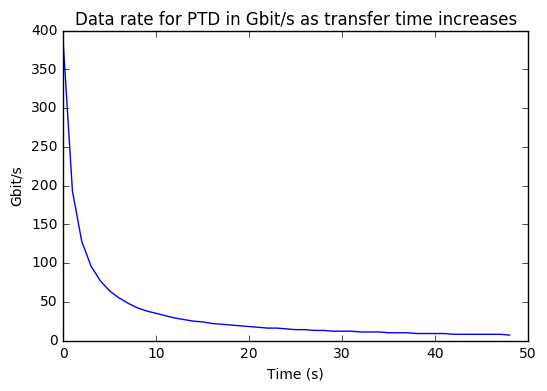

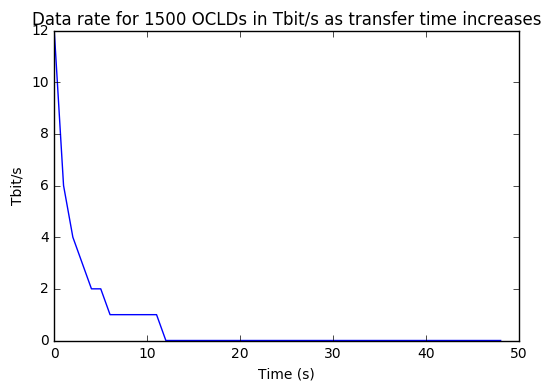

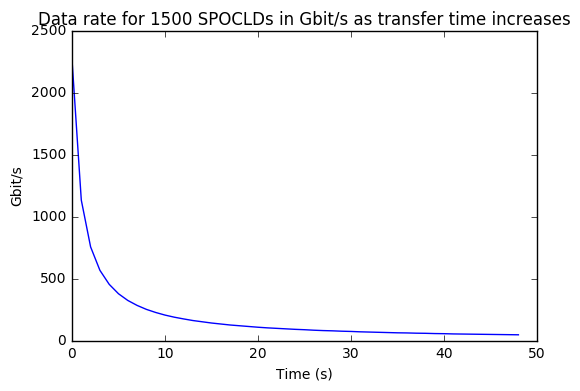

In [17]:
print 'PTD size'    , PTD_size.get('GB')
print 'OCLD size'   , OCLD_size.get('GB')
print 'SPOCLD size' , SPOCLD_size.get('MB')

# Trivial data rate calculations.
transfer_times = np.arange(1,50,) # start at 1, go until 50 in steps of 1.

# Define simple function to help plot data rate.
#
# Here time is the transfer time, and data_quantity,
# the data quantity object describing some number of
# bits. It returns the number of bits sent per unit
# of time.
def resulting_rate(times,data_quantity,unit='bit'):
    
    # Simple error checking...
    if times is None:
        return []
    elif len(times) == 0:
        return []
    
    # The object to be returned.
    rates = []
    
    # For each potential transfer time...
    for t in times:
        
        # Get the bit value
        bit_value = data_quantity.bits / t
        
        # Convert to desired format
        if isBitUnitValid(unit):
            
            if unit == 'bit':
                rates.append(bit_value)
            elif unit == 'kbit':
                rates.append(bit_value / pow(10, 3)) 
            elif unit == 'Mbit':
                rates.append(bit_value / pow(10, 6)) 
            elif unit == 'Gbit':
                rates.append(bit_value / pow(10, 9))  
            elif unit == 'Tbit':
                rates.append(bit_value / pow(10, 12)) 
            elif unit == 'Pbit':
                rates.append(bit_value / pow(10, 15)) 
            else:
                rates.append(bit_value)
            
    return rates

# Now plot the PTD data rate
unit_to_plot = 'Gbit'
plt.plot(resulting_rate(transfer_times,PTD_size,unit_to_plot))
plt.ylabel(str(unit_to_plot) + '/s')
plt.xlabel('Time (s)')
plt.title('Data rate for PTD in ' + str(unit_to_plot) +'/s as transfer time increases')
plt.show()

# Now plot the OCLD data rate
unit_to_plot = 'Tbit'
plt.plot(resulting_rate(transfer_times,OCLD_size * 1500,unit_to_plot))
plt.ylabel(str(unit_to_plot) + '/s')
plt.xlabel('Time (s)')
plt.title('Data rate for 1500 OCLDs in ' + str(unit_to_plot) +'/s as transfer time increases')
plt.show()

# Now plot the SPCOLD data rate

unit_to_plot = 'Gbit'
plt.plot(resulting_rate(transfer_times,SPOCLD_size * 1500 ,unit_to_plot))
plt.ylabel(str(unit_to_plot) + '/s')
plt.xlabel('Time (s)')
plt.title('Data rate for 1500 SPOCLDs in ' + str(unit_to_plot) +'/s as transfer time increases')
plt.show()

---

The cell below provides a scratch area for custom data rate calculations. 

In [18]:
### THIS IS THE SCRATCH AREA, have fun.

---

## 5. Data Format Overhead Calculations

Note I used [HDFView](https://support.hdfgroup.org/products/java/hdfview/) to view the HDF5 files created below. This allowed the structure of the data to be verified. I do a simple empirical test on the OCLD to try and estimate file storage overheads.

First I create a compute the size of a simplified OCLD file.

In [19]:
import h5py
import os

# USEFUL VARS
TEXT_12_CHARS = '000000000000'
N_chan        = 128  # Frequency channels
N_bin         = 128  # Phase bins
N_sub         = 64   # Sub-integrations
N_bit         = 8    # bits per data cube sample 
N_cand        = 1    # Number of candidates in the OCLD
N_list_att    = 10   # Number of list attributes
N_list        = 1000 # Entries in the list
N_sheet       = 3    # Number of sheets
r             = 256  # Sheet rows
c             = 256  # Sheet columns
N_ocld_att    = 5    # OCLD attributes
#################################
# Compute Theoretical OCLD size #
#################################

# Total OLCD attribute volume:
ocld_att_vol = DataQuantity((96 * 4) + 32)

# Total OLCD List volume:
L_size = DataQuantity(96 * 10) * N_list

# Total OLCD Candidate data attribute volume:
D_att_vol = 96

# Data cube size:
C_search_size = DataQuantity(N_chan * N_bin * N_sub * N_bit) # The cube size

# Sheet volume
S_size = DataQuantity(3 * (256 * 256))

# Candidate data metadata.
#
# To derive an estimate for metadata volume, we naively 
# assume there to be 10 attributes each 96 bits in size.
# This corresponds to 960 bits per Candidate data Entity.
M_search_size = DataQuantity(960)

# Total size of Candidate data entity:
D_size = D_att_vol + C_search_size + S_size + M_search_size

# Total size
OCLD_Size = ocld_att_vol + L_size + (N_cand * D_size)

print 'Theoretical OCLD size (no overheads) ' , OCLD_Size , ' (',OCLD_Size.get('MB'),')'
print 'where N_cand = ', N_cand , '.'

OCLD_Size_Bits_Theoretical = OCLD_Size.bits



Theoretical OCLD size (no overheads)  9546688 bits  ( 1.193336 MB )
where N_cand =  1 .


---

Now simply pack the same data into a HDF5 file. Then we check if the result file size differs greatly from the theoretical size.

---

In [20]:
#####################
#     Clean up      #
#####################

# Datatypes:
# i1 - 8-bit signed integer
# i4 - 32-bit signed integer
# i8 - 64-bit signed integer
# f4 - 32-bit signed float
# f8 - 64-bit signed float

# Paths to test HDF5 files
OCLD_Path   = 'OCLD_Example.hdf5'

# Clean up any pre-existing files:
try:
    os.remove(OCLD_Path)
except:
    print 'No file to remove yet.'

#####################
# Create HDF5 Files #
#####################
OCLD_HDF5   = h5py.File(OCLD_Path, "w")

# Create OCLD structure:
#
# It has 5 attributes, all 12 character strings.
# It has two entities. Candidate data, which is in turn
# made of metadata, and a data cube. Then there is List
# data.

candidate_data_1 = OCLD_HDF5.create_group("CandidateData1")

candidate_data_1.attrs['Scheduling Block ID'] = TEXT_12_CHARS
candidate_data_1.attrs['Program Block ID']    = TEXT_12_CHARS
candidate_data_1.attrs['Scan ID']             = TEXT_12_CHARS
candidate_data_1.attrs['Beam ID']             = TEXT_12_CHARS
candidate_data_1.attrs['Candidate Count']     = TEXT_12_CHARS

# Candidate list
cand_list = []

# Here we simply loop around to populate a list data structure.
# It has N_list rows, and 10 columns. Each data items is a 12 
# character 12, requiring 96 bits of storage space.
for i in range(0,N_list):
    for j in range(0,N_list_att):
        
        # Two text attributes, 6 numerical, and 2 boolean
        row = [TEXT_12_CHARS,TEXT_12_CHARS,TEXT_12_CHARS,TEXT_12_CHARS,TEXT_12_CHARS,\
               TEXT_12_CHARS,TEXT_12_CHARS,TEXT_12_CHARS,TEXT_12_CHARS,TEXT_12_CHARS]
        cand_list.append(row)

# Physically add the list to the data structure
list = OCLD_HDF5.create_dataset('List', (len(cand_list),N_list_att),'S12', cand_list)

# Here we use a loop, so that more than one candidate entity can be added 
# to the HDF5 file.
for i in range(0,N_cand):

    # Now create the data cube.
    # Data cube has an attribute and a matrix.
    data_cube      = candidate_data_1.create_dataset("DataCube"+str(i), (N_chan,N_bin,N_sub), dtype='f2')
    data_cube[...] = np.ones((N_chan,N_bin,N_sub))
    data_cube.attrs['Candidate ID'] = TEXT_12_CHARS

    # Metadata has 10 attributes
    metadata  = candidate_data_1.create_dataset("Metadata"+str(i), (1,), dtype='i1')
    metadata.attrs['a'] = TEXT_12_CHARS
    metadata.attrs['b'] = TEXT_12_CHARS
    metadata.attrs['c'] = TEXT_12_CHARS
    metadata.attrs['d'] = TEXT_12_CHARS
    metadata.attrs['e'] = TEXT_12_CHARS
    metadata.attrs['f'] = TEXT_12_CHARS
    metadata.attrs['g'] = TEXT_12_CHARS
    metadata.attrs['h'] = TEXT_12_CHARS
    metadata.attrs['i'] = TEXT_12_CHARS
    metadata.attrs['Candidate ID'] = TEXT_12_CHARS

# Now calculate overhead
OCLD_Size_Bits   = convertByteToBit(os.path.getsize(OCLD_Path),'B')

print 'HDF5 File Size is '  , DataQuantity(OCLD_Size_Bits).get('MB')

# Now compute difference in bits:
OCLD_Diff   = OCLD_Size_Bits - OCLD_Size_Bits_Theoretical

# Now compute % difference
OCLD_Percent_Diff   = (float(OCLD_Diff) / float(OCLD_Size_Bits_Theoretical)) * 100

# Print output
print 'HDF5 OCLD is '  , OCLD_Percent_Diff   , '% of theoretical size.'

OCLD_Diff_dq = DataQuantity(OCLD_Diff)

print 'Practical difference: ', OCLD_Diff_dq.get('MB')

HDF5 File Size is  3.30544 MB
HDF5 OCLD is  176.991559795 % of theoretical size.
Practical difference:  2.112104 MB


---

When you run this code for different values of $N_{cand}$, we can see how the overheads change as the file becomes larger. The values observed empirically are listed below in Table 16.

|Test #|  $N_{cand}$| Theoretical Size (MB) | HDF5 Size (MB) | % Difference | Difference in MB |
|------|------------|-----------------------|----------------|--------------|------------------|
|  1   |      1     |       1.193336        |    3.30544     |   ~177 %     |     2.112104     |
|  2   |      2     |       2.26662         |    5.40464     |   ~138 %     |     3.13802      |
|  3   |      4     |       4.413188        |    9.600992    |   ~118 %     |     5.187804     |
|  4   |      8     |       8.706324        |    17.995744   |   ~107 %     |     9.28942      |
|  5   |     16     |       17.292596       |    34.787296   |   ~101 %     |     17.4947      |
|  6   |     32     |       34.46514        |    68.368352   |   ~98 %      |     33.903212    |
|  7   |     64     |       68.810228       |    135.535848  |   ~97 %      |     135.535848   |
|  8   |     128    |       137.500404      |    269.871376  |   ~96 %      |     132.370972   |
|  9   |     256    |       274.880756      |    538.536136  |   ~95.9 %    |     263.65538    |
|  10  |     512    |       549.64146       |   1075.86696   |   ~95.7 %    |     526.2255     |
|  11  |     1024   |       1099.162868     |   2150.526288  |   ~95.7 %    |     1051.36342   |
**Table 16.** The changes in OCLD size due to HDF5 file overheads.

This appears to show that the overhead is approximately 100% as $N_{cands}$ grows larger. This is of course, assuming the HDF5 file was packed correctly during the test, and that there are no optimisations possible.

If you assume a communication protocol overheads on top of this, the data volumes sent from CSP to SDP increase quite a bit. Some example data volumes and rates are given in Table 17.

|Scenario #|$N_{cand}$| HDF5 Size (MB) | % Overhead   |Change (MB)| Data sent (MB)  | Rate (Mbits/s) over 180 (s) |
|----------|----------|----------------|--------------|-----------|-----------------|-----------------------------|
|    1     |     1024 |   2150.526288  |   0.1 %      |    2.151  |     ~2153       |            11.96            |
|    2     |     1024 |   2150.526288  |   0.2 %      |    4.301  |     ~2155       |            11.97            |
|    3     |     1024 |   2150.526288  |   0.5 %      |   10.75   |     ~2161       |            12.01            |
|    4     |     1024 |   2150.526288  |   1.0 %      |   21.505  |     ~2172       |            12.07            |
|    5     |     1024 |   2150.526288  |   2.0 %      |   43.01   |     ~2194       |            12.19            |
|    6     |     1024 |   2150.526288  |   3.0 %      |   64.516  |     ~2215       |            12.31            |
|    7     |     1024 |   2150.526288  |   4.0 %      |   86.02   |     ~2237       |            12.43            |
|    8     |     1024 |   2150.526288  |   5.0 %      |   107.53  |     ~2258       |            12.57            |
|    9     |     1024 |   2150.526288  |   10.0 %     |   215.05  |     ~2366       |            13.14            |
**Table 17.** Impact of additional communication overhead, assuming HDF5 files as defined, and a varying overhead percentage. This is for a **single** OCLD only.

These data rates appear manageable. However for pulsar search there will be 1500 beams, thus 1500 OLCDs. The real data rate, and the cost of the communication overheads, will therefore be greater in practice.

For example: 1500 HDF5 files of 2258 MB in size (5% communation overhead), yeild a total data volume per scan of 3.38 TB. Sent over 180 seconds, the data rate would be 150.5 Gb/s (gigabits per second). Of course such numbers are still estimates.

## 6. Miscellaneous Activity Diagrams

Here are some supporting activity diagrams, explaining how the NIP processing pipelines function. These activity diagrams are necessarily abstract.

![Activity Diagram for Pulsar and Transient Search](images/RL_ActivityDiagram_PANDT_Search.png)
**Figure 9.** An activity diagram descrbing the steps used to process data in the pulsar/transient search pipelines.

![Activity Diagram for Pulsar Timing and Dynamic Spectra Mode](images/RL_ActivityDiagram_TimingAndDS.png)
**Figure 10.**  An activity diagram descrbing the steps used to process data when operating in pulsar timing / dynamic spectra mode.